# Imports and custom functions

In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

In [2]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05) & (df["logCPM"]>2), "Significant"] = "FDR<0.05\nlogCPM>2"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [3]:
def plot_MA(df, df_name):

    """Plot MA"""

    sns.set(font_scale=2)
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05\nlogCPM>2"],
                          palette=["black", "blue"],
                          scatter_kws={'alpha':1},
                          height=15,
                          aspect=1)
    ax = plt.gca()
    ax.set_title(f"MA plot for {df_name}")

In [4]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id")
    df["Significant"] = "No"
    return df

In [5]:
def plot_FC_correlation(df, FC_1_name, FC_2_name, hue, hue_order):

    """Plot correlation between FCs"""

    sns.set(font_scale=2)
    sns_plot = sns.lmplot(x=f"logFC_{FC_1_name}",
                          y=f"logFC_{FC_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=hue,
                          hue_order=hue_order,
                          palette=["black", "blue", "red", "green"],
                          scatter_kws={'alpha':1},
                          height=15,
                          aspect=1)
    ax = plt.gca()
    ax.set_title(f"FCs between {FC_1_name} and {FC_2_name}")

In [6]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

# Input files

In [7]:
ip_path = "../WAGO_3_IP/results/DE__N2_Input_Rpph__N2_xf119_Rpph/plot_small_RNAs/22G.tsv"
ip_name = "WAGO-3"

Dpf_3_null_path = "../small_RNA_seq_15_C/results/DE__WT_dpf3__Dpf_3_null/plot_small_RNAs/22G.tsv"
Dpf_3_null_name = "Dpf_3_null"

Dpf_3_S784A_path = "../small_RNA_seq_15_C/results/DE__WT_dpf3__Dpf_3_S784A//plot_small_RNAs/22G.tsv"
Dpf_3_S784A_name = "Dpf_3_S784A"

mut_2_path = "../small_RNA_seq_15_C/results/DE__WT_other__mut_2/plot_small_RNAs/22G.tsv"
mut_2_name = "mut_2"

mut_7_path = "../small_RNA_seq_15_C/results/DE__WT_other__mut_7/plot_small_RNAs/22G.tsv"
mut_7_name = "mut_7"

Dpf_3_null_first_path = "../small_RNA_seq_15_C/results/DE__WT_dpf3_first__Dpf_3_null/plot_small_RNAs/22G.tsv"
Dpf_3_null_first_name = "Dpf_3_null_first"

Dpf_3_S784A_second_path = "../small_RNA_seq_15_C/results/DE__WT_dpf3_second__Dpf_3_S784A/plot_small_RNAs/22G.tsv"
Dpf_3_S784A_second_name = "Dpf_3_S784A_second"

Dpf_3_null_old_path = "../small_RNA_seq_25_C/results/DE__WT__dpf_3_delta/plot_small_RNAs/22G.tsv"
Dpf_3_null_old_name = "Dpf_3_null_old"

dpf_3S784A_old_path = "../small_RNA_seq_25_C/results/DE__WT__dpf_3S784A/plot_small_RNAs/22G.tsv"
dpf_3S784A_old_name = "Dpf_3_S784A_old"

ip_wago_9_path = "../WAGO_9_IP/results/DE__wago-9_input__wago-9_IP/plot_small_RNAs/22G.tsv"
ip_wago_9_name = "WAGO-9"

ip_csr_1_path = "../csr_1_IP/results/DE__csr-1_input__csr-1_IP/plot_small_RNAs/22G.tsv"
ip_csr_1_name = "csr-1"

wt_path = "../csr_1_IP/results/DE__csr-1_input__csr-1_IP/plot_small_RNAs/22G.tsv"
wt_name = "csr-1"

## 1. IP WAGO-3 vs Dpf_3_null

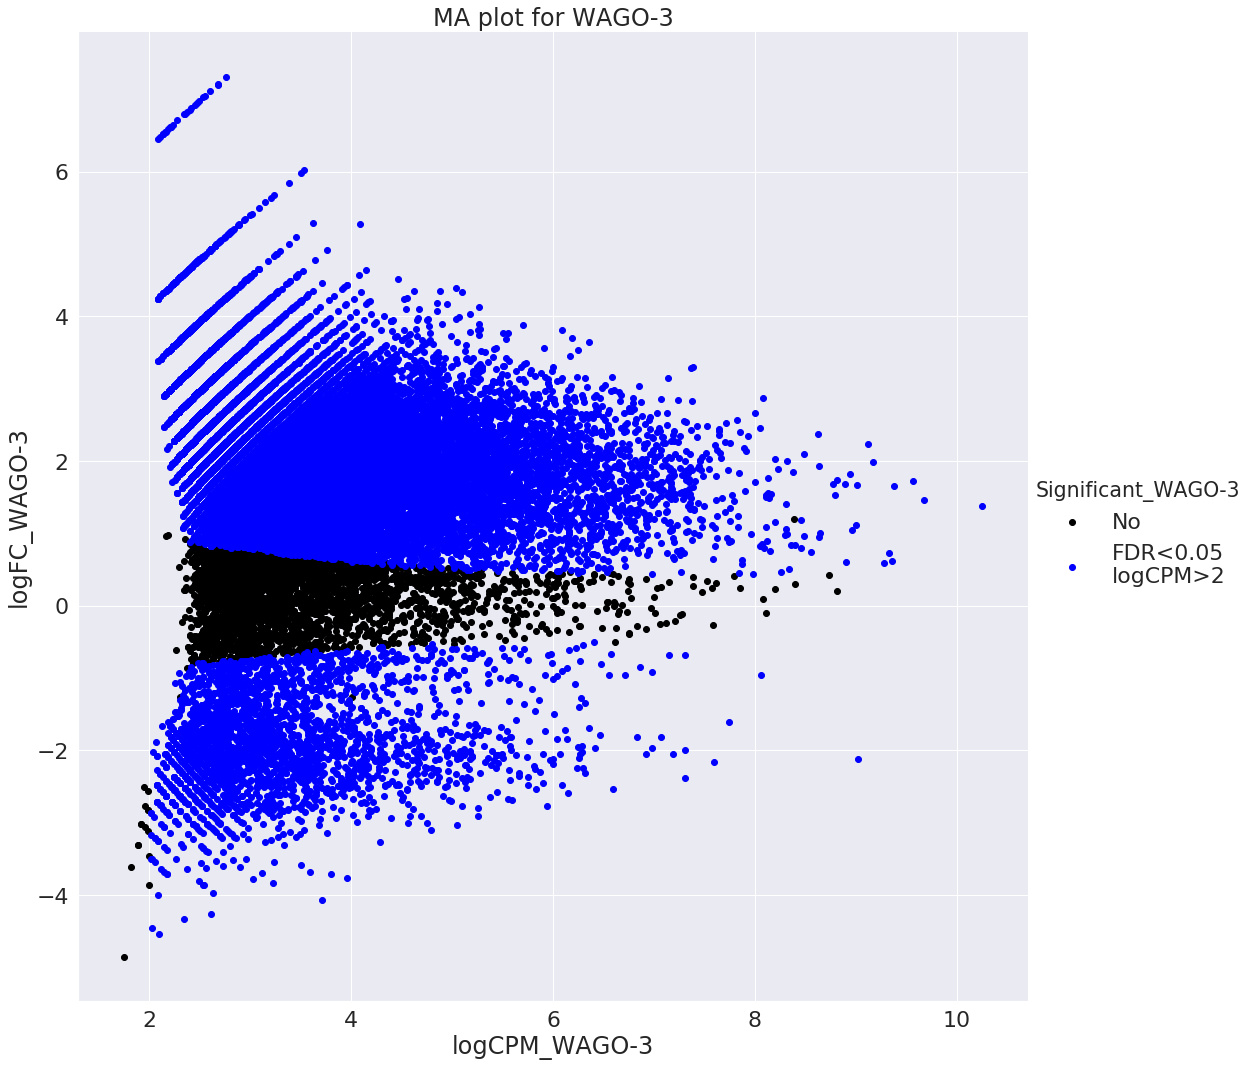

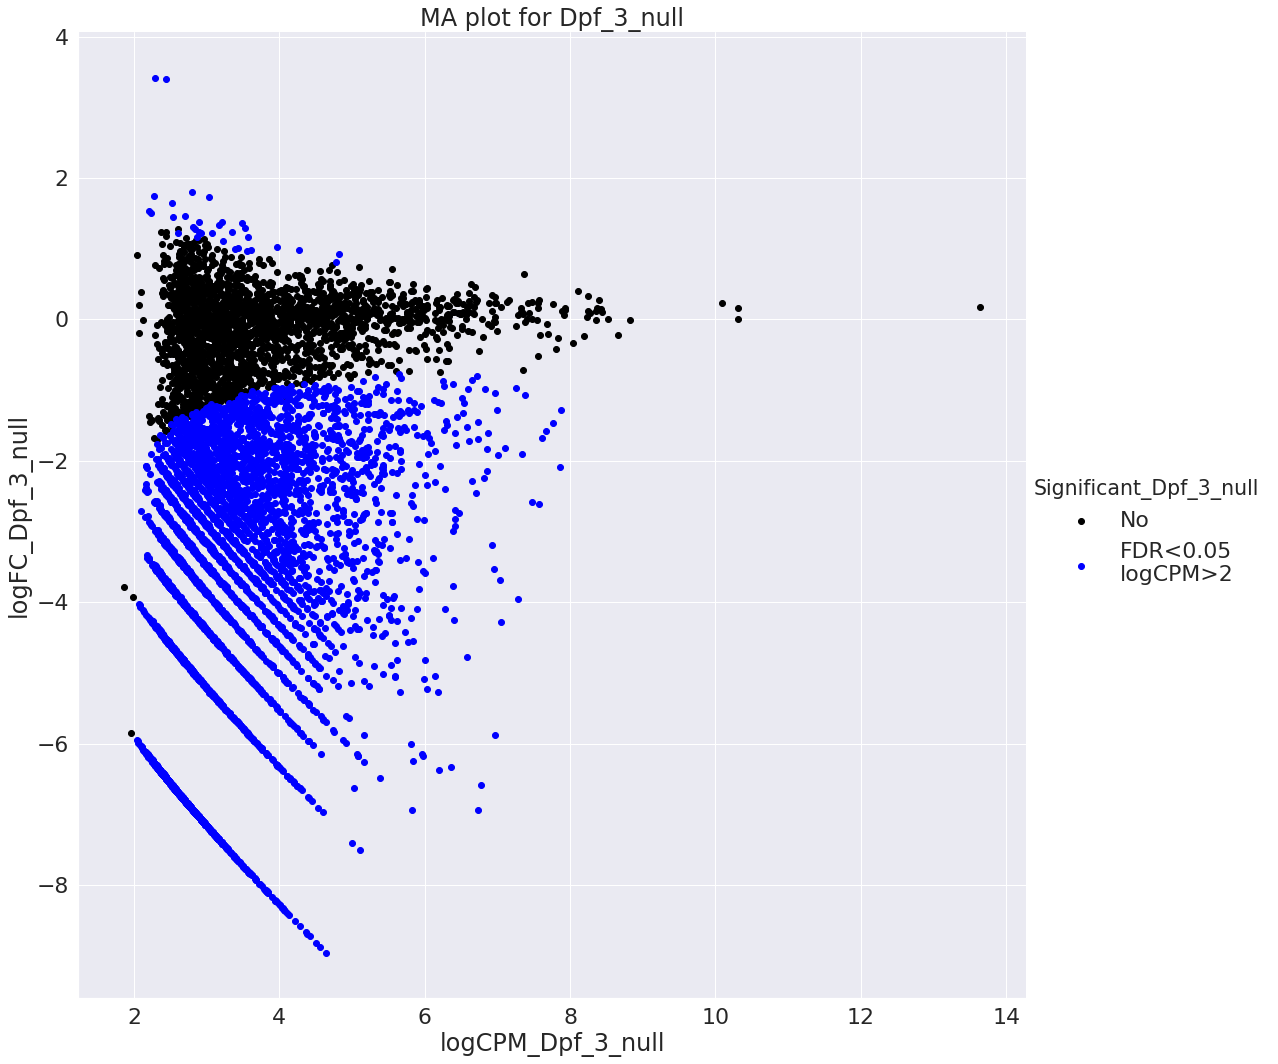

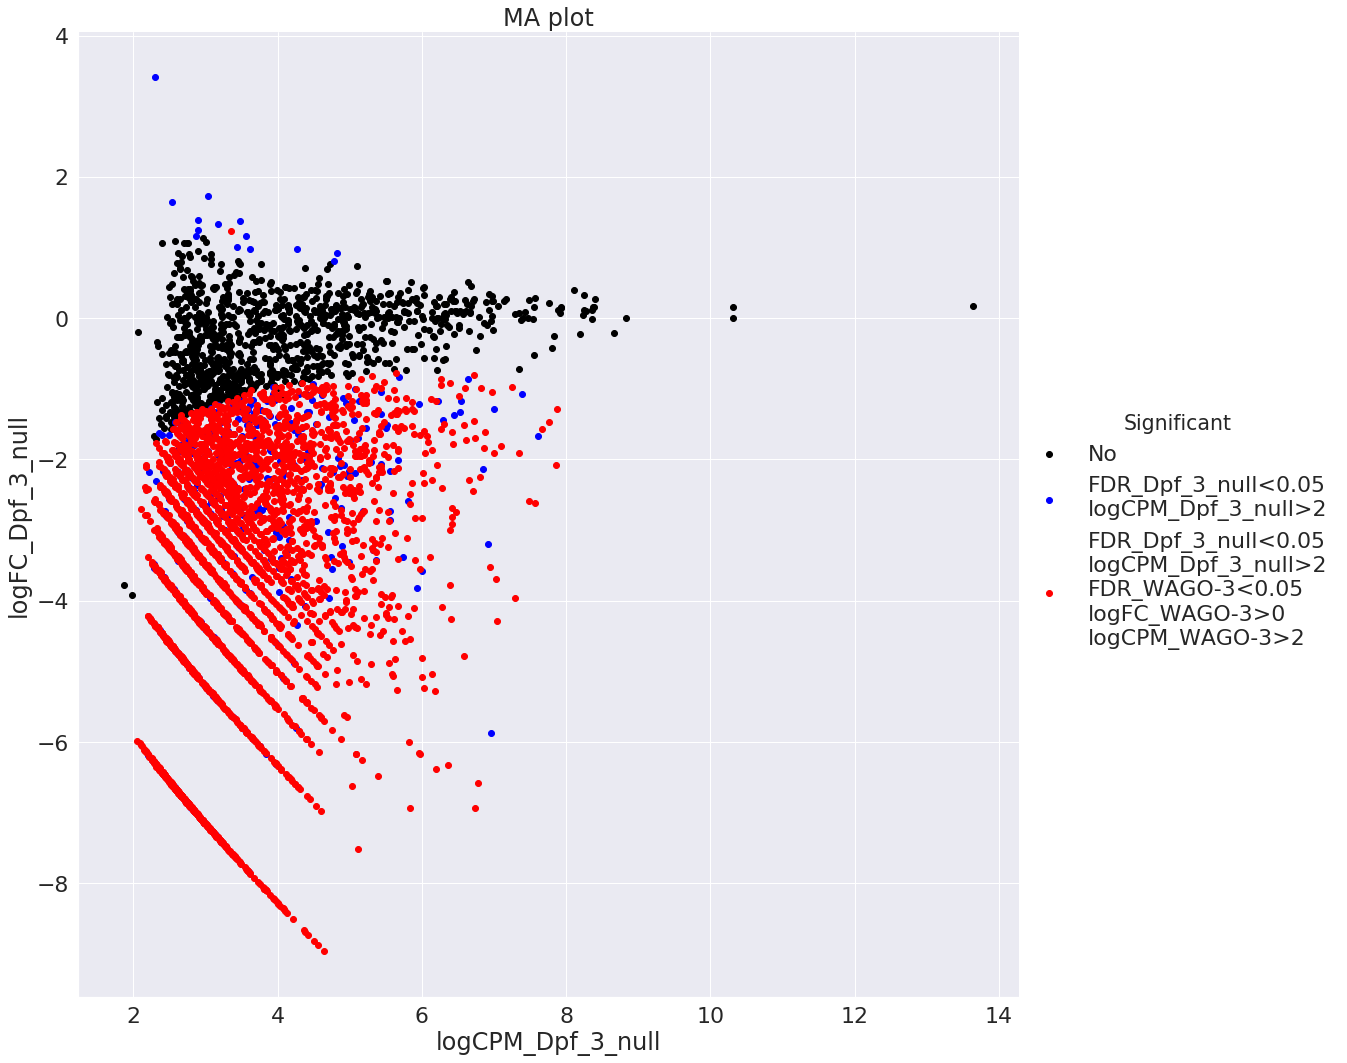

Significant
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_W...         3319
No                                                         1018
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                    380

In [8]:
df_1_path = ip_path
df_2_path = Dpf_3_null_path
df_1_name = ip_name
df_2_name = Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()

pd.DataFrame(df_all["Significant"].value_counts())

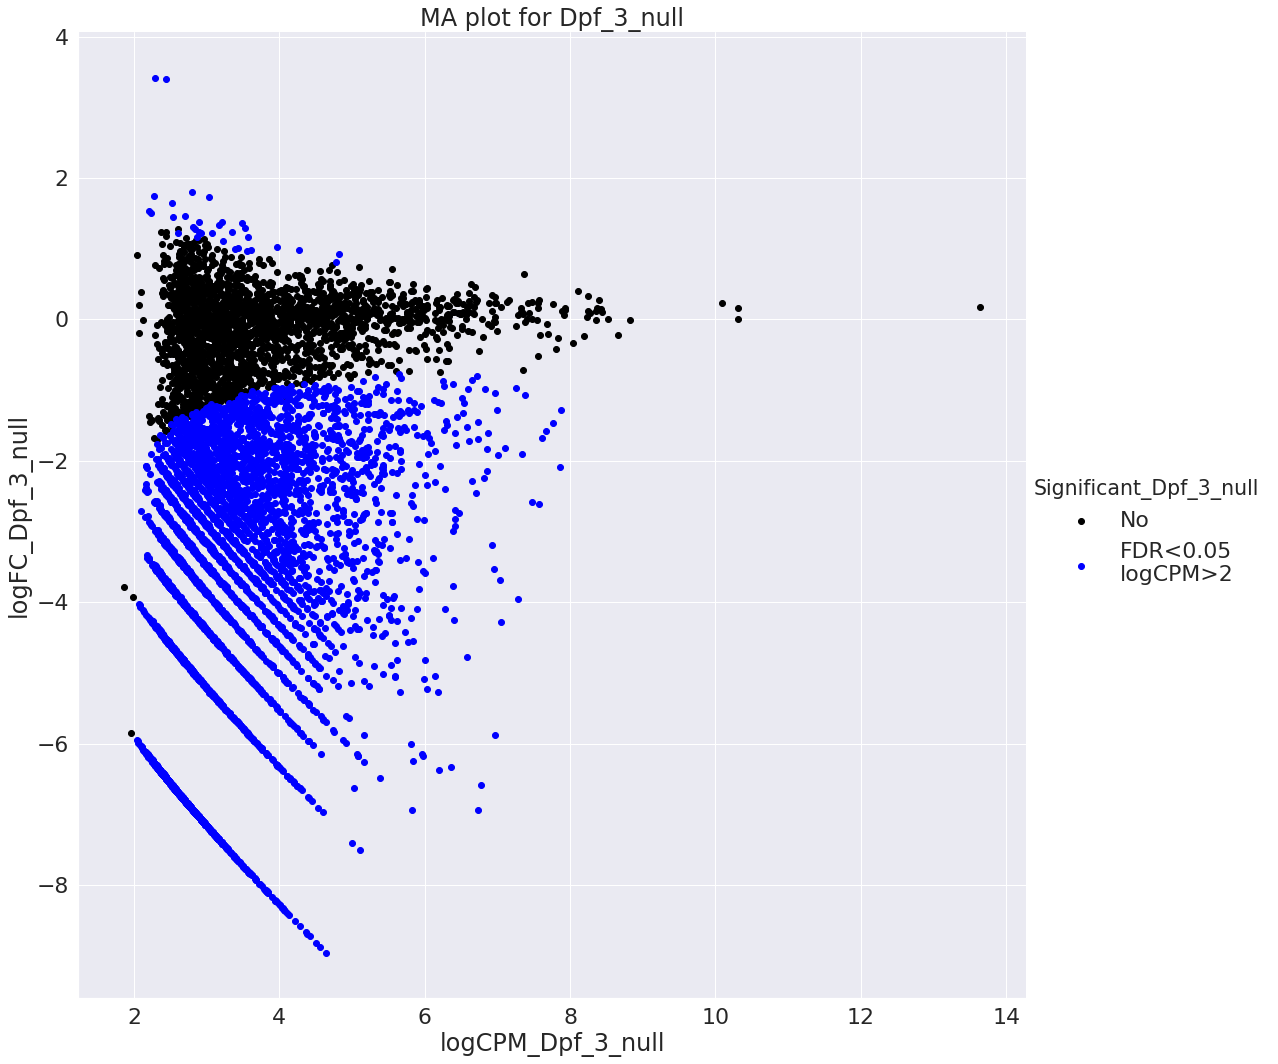

In [9]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot for {df_name}")

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 2. IP WAGO-3 vs Dpf_3_S784A

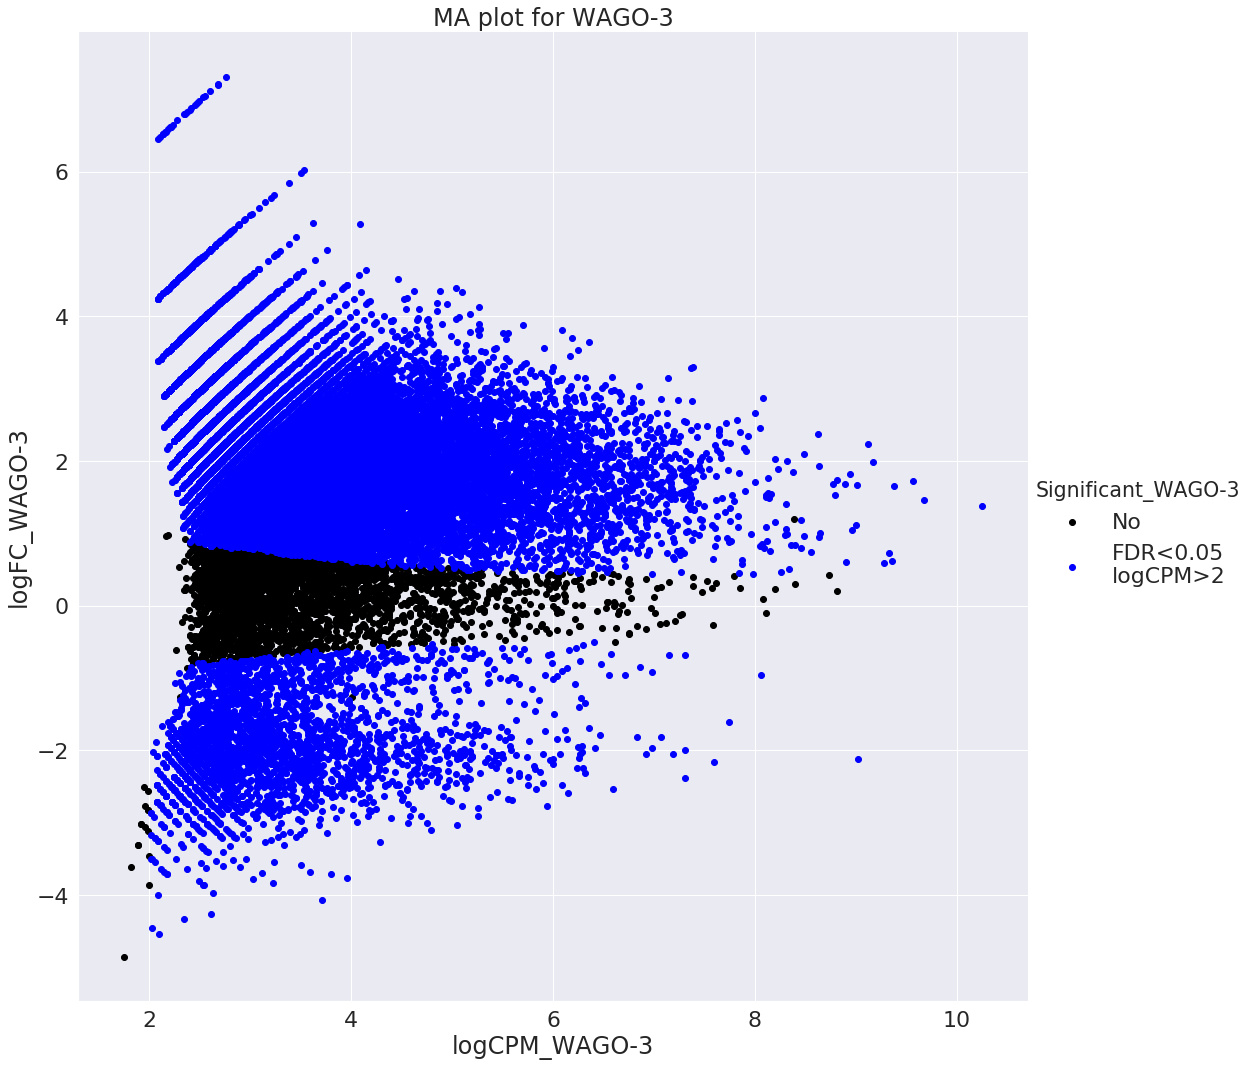

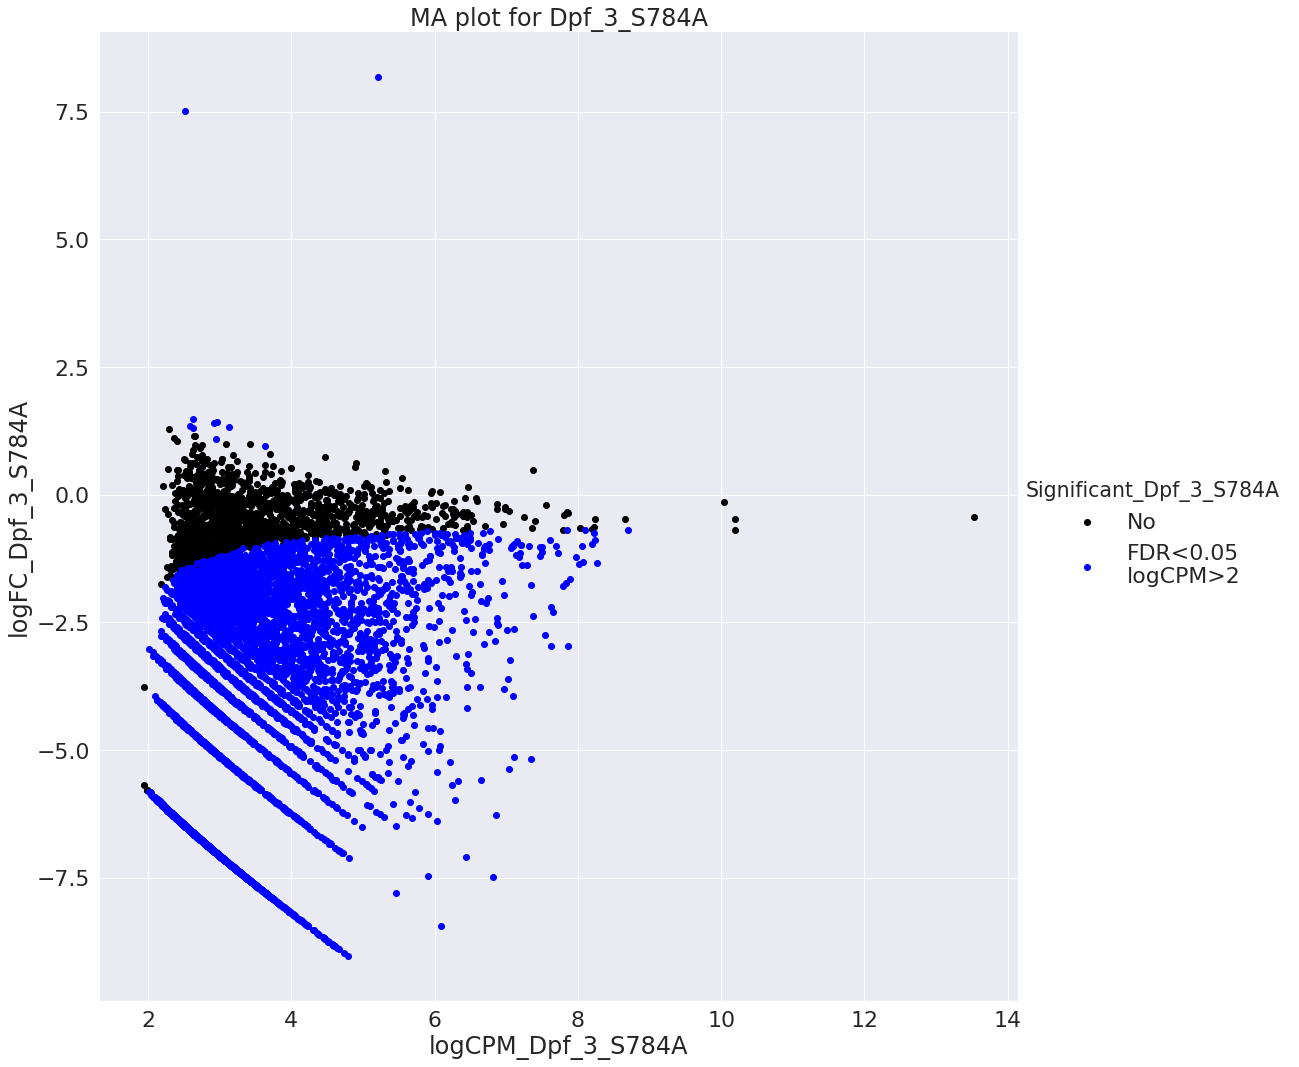

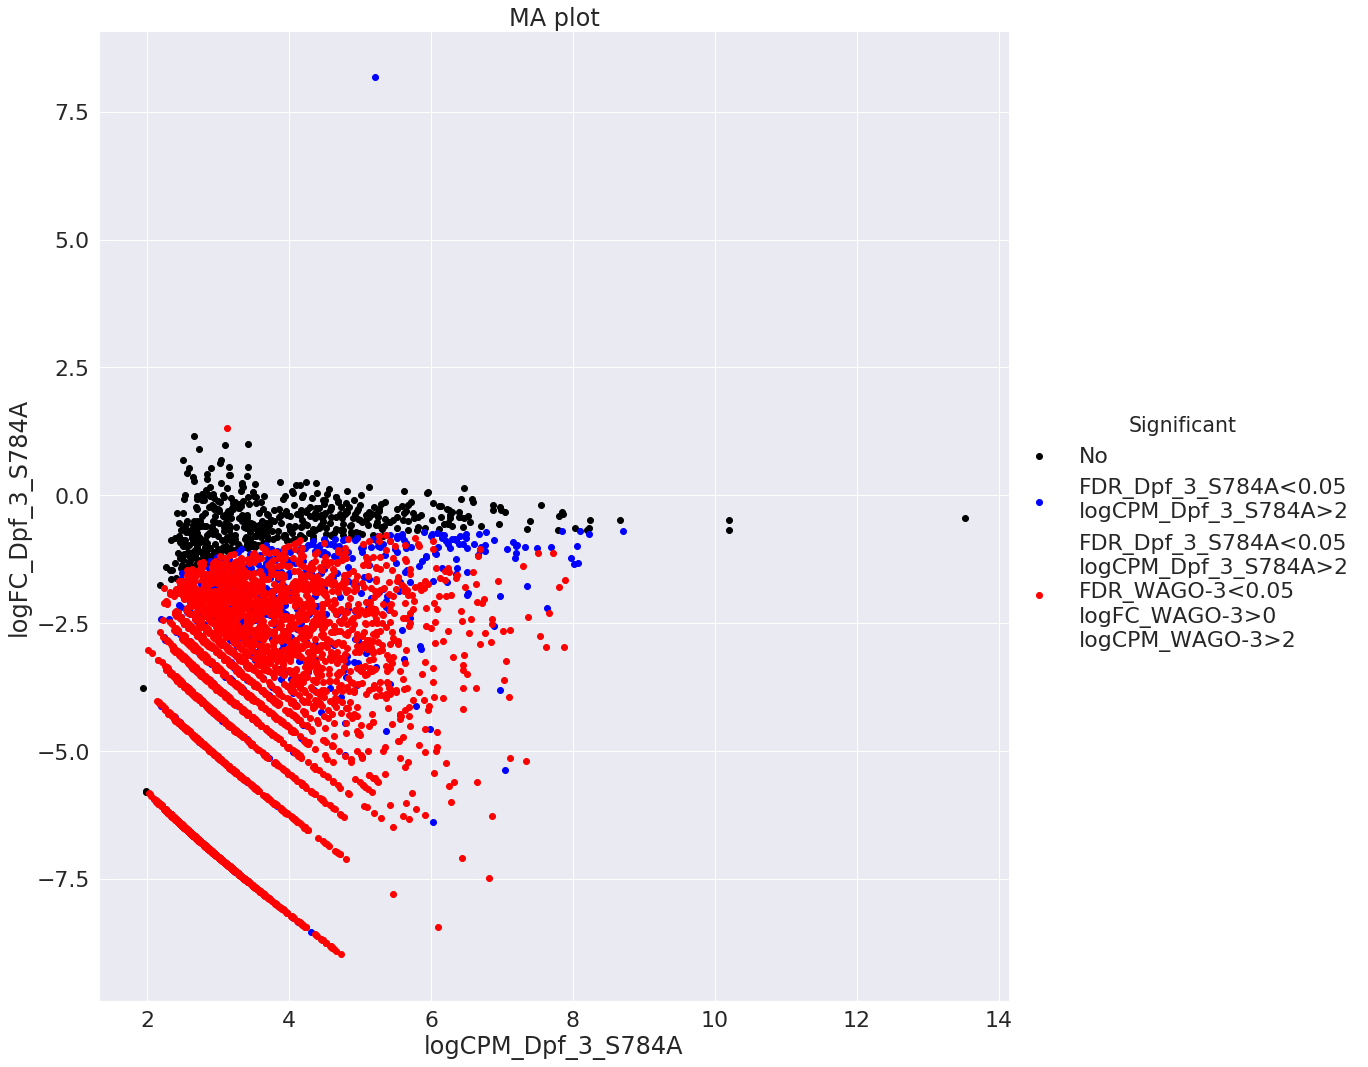

Significant
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR...         3781
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                  635
No                                                          539

In [10]:
df_1_path = ip_path
df_2_path = Dpf_3_S784A_path
df_1_name = ip_name
df_2_name = Dpf_3_S784A_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()

pd.DataFrame(df_all["Significant"].value_counts())

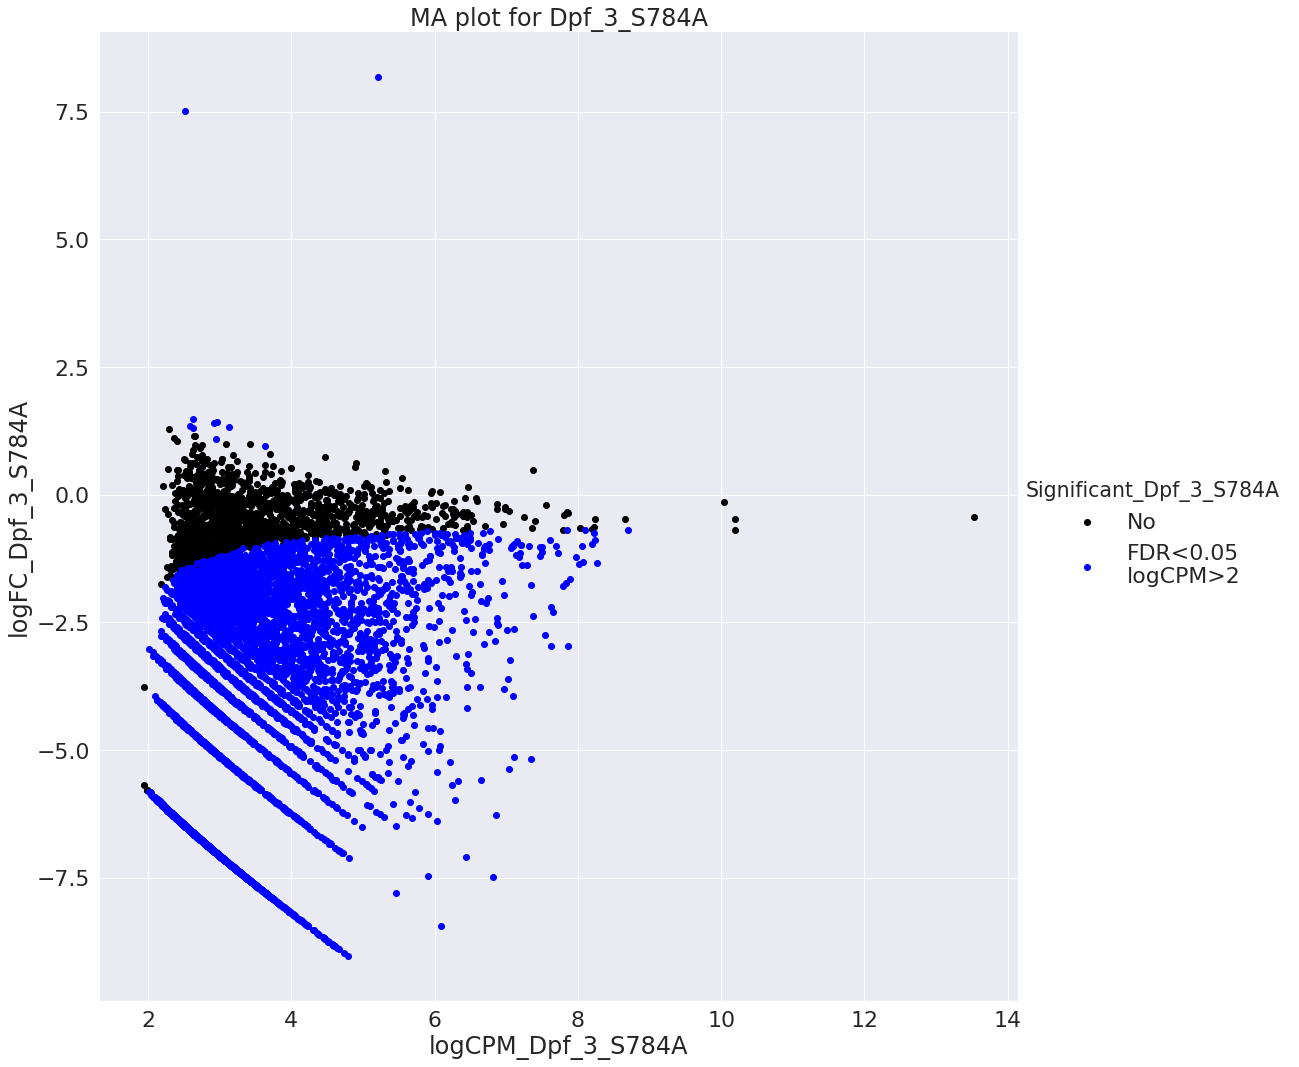

In [11]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot for {df_name}")

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 3. IP WAGO-3 vs mut_2

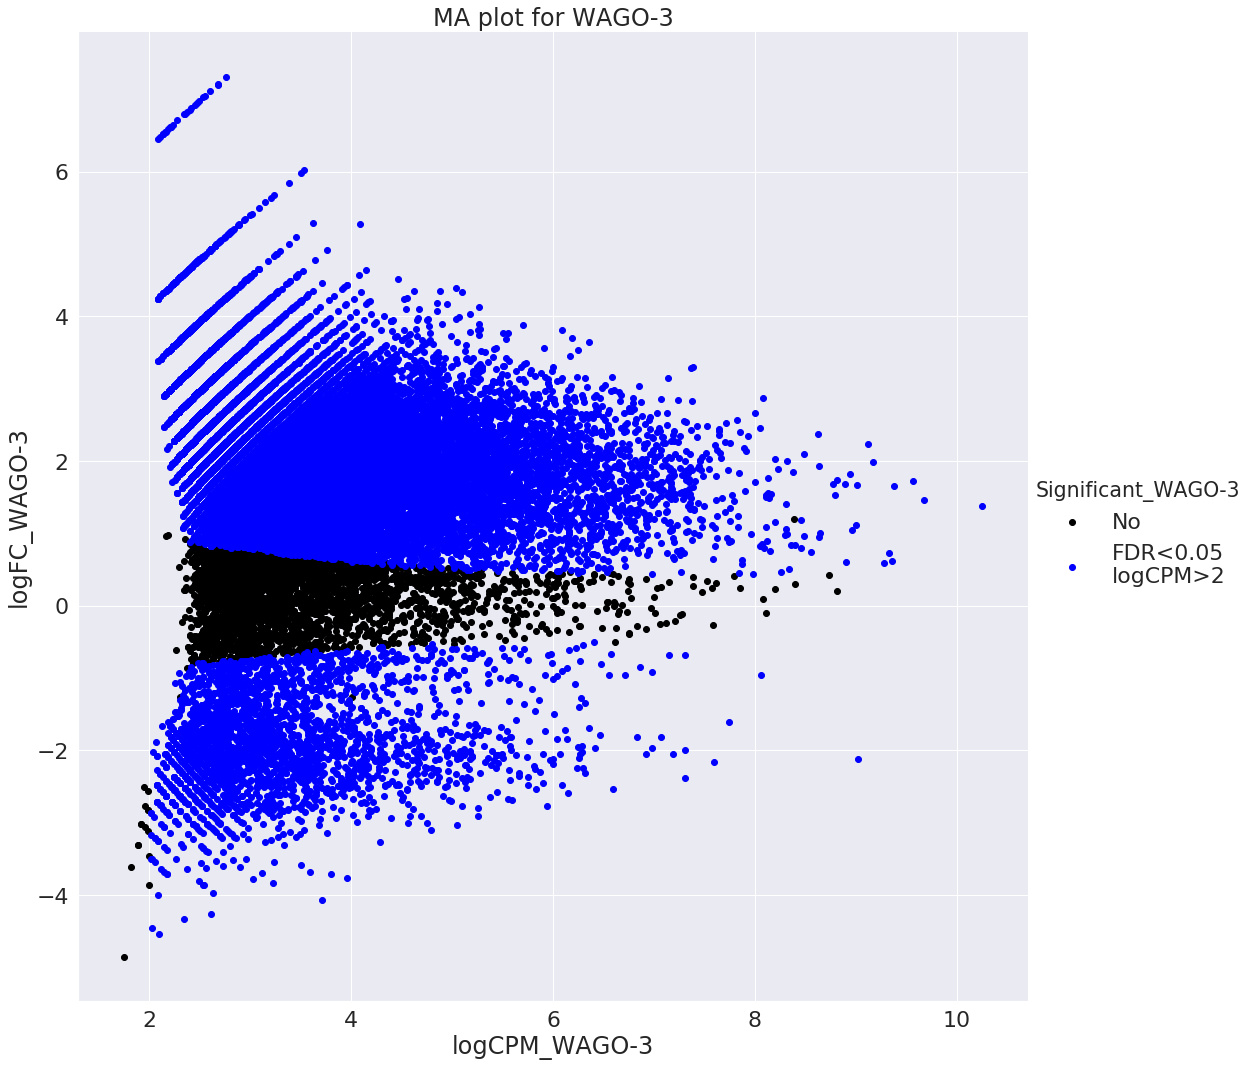

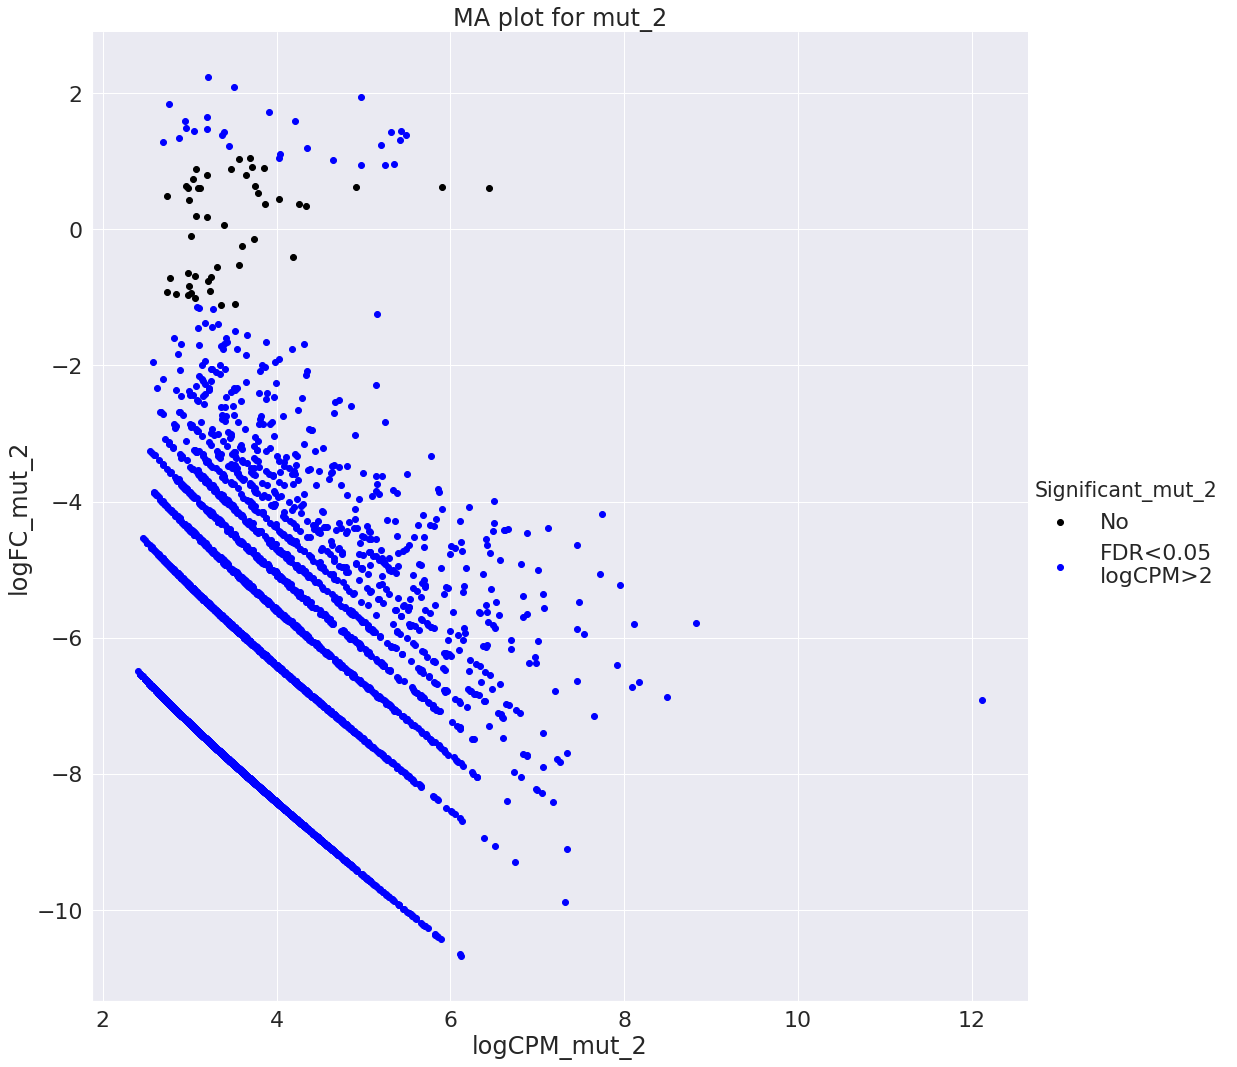

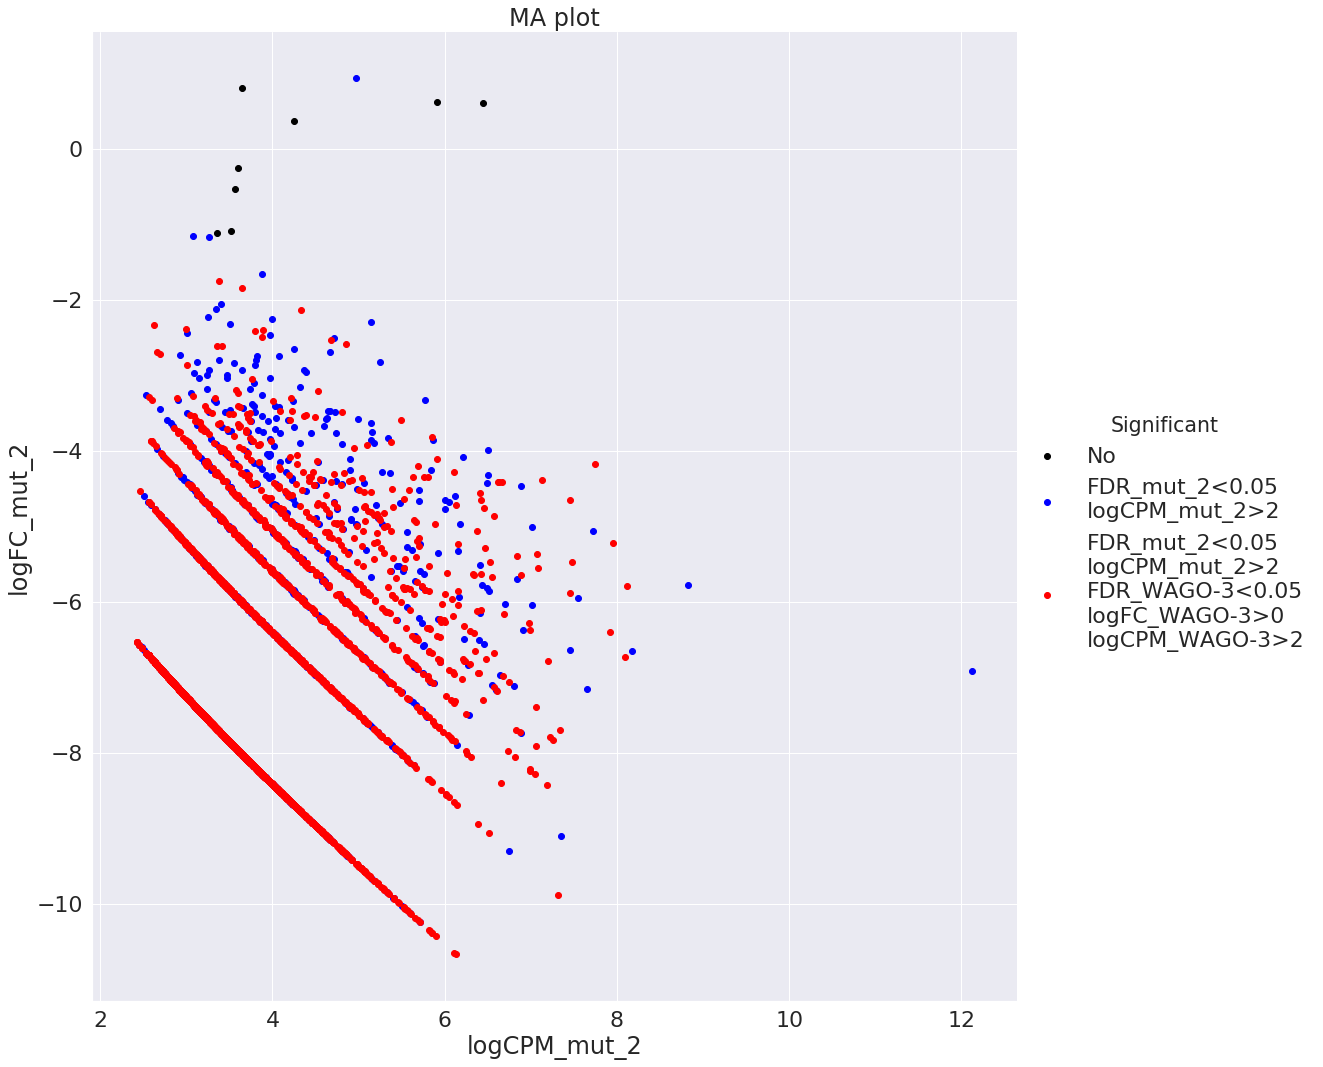

Significant
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-3<0.05...         3143
FDR_mut_2<0.05\nlogCPM_mut_2>2                              821
No                                                            8

In [12]:
df_1_path = ip_path
df_2_path = mut_2_path
df_1_name = ip_name
df_2_name = mut_2_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()

pd.DataFrame(df_all["Significant"].value_counts())

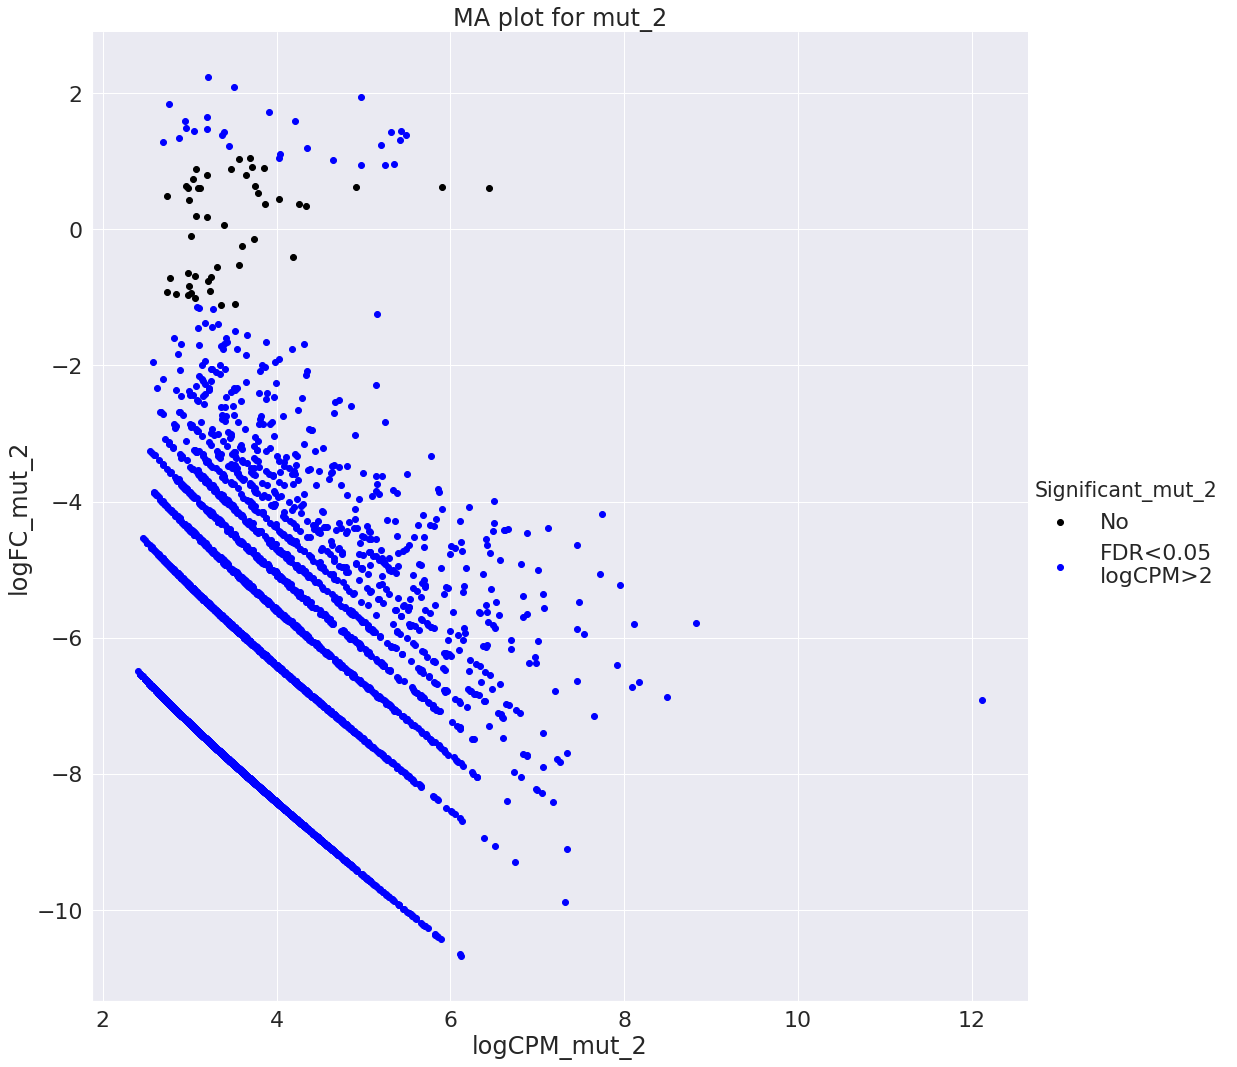

In [13]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot for {df_name}")

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 4. IP WAGO-3 vs mut_7

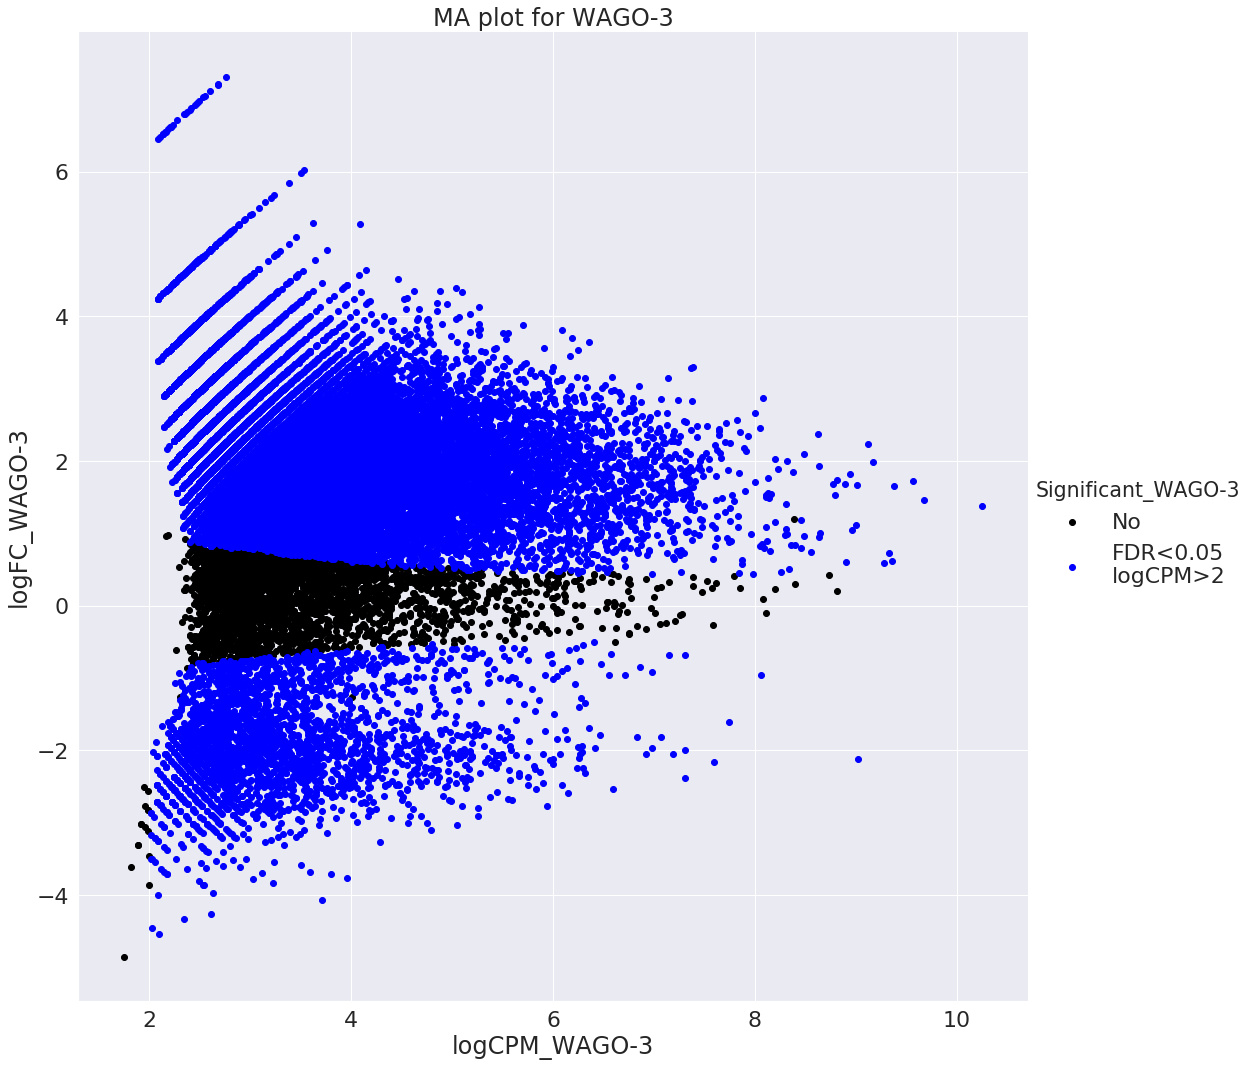

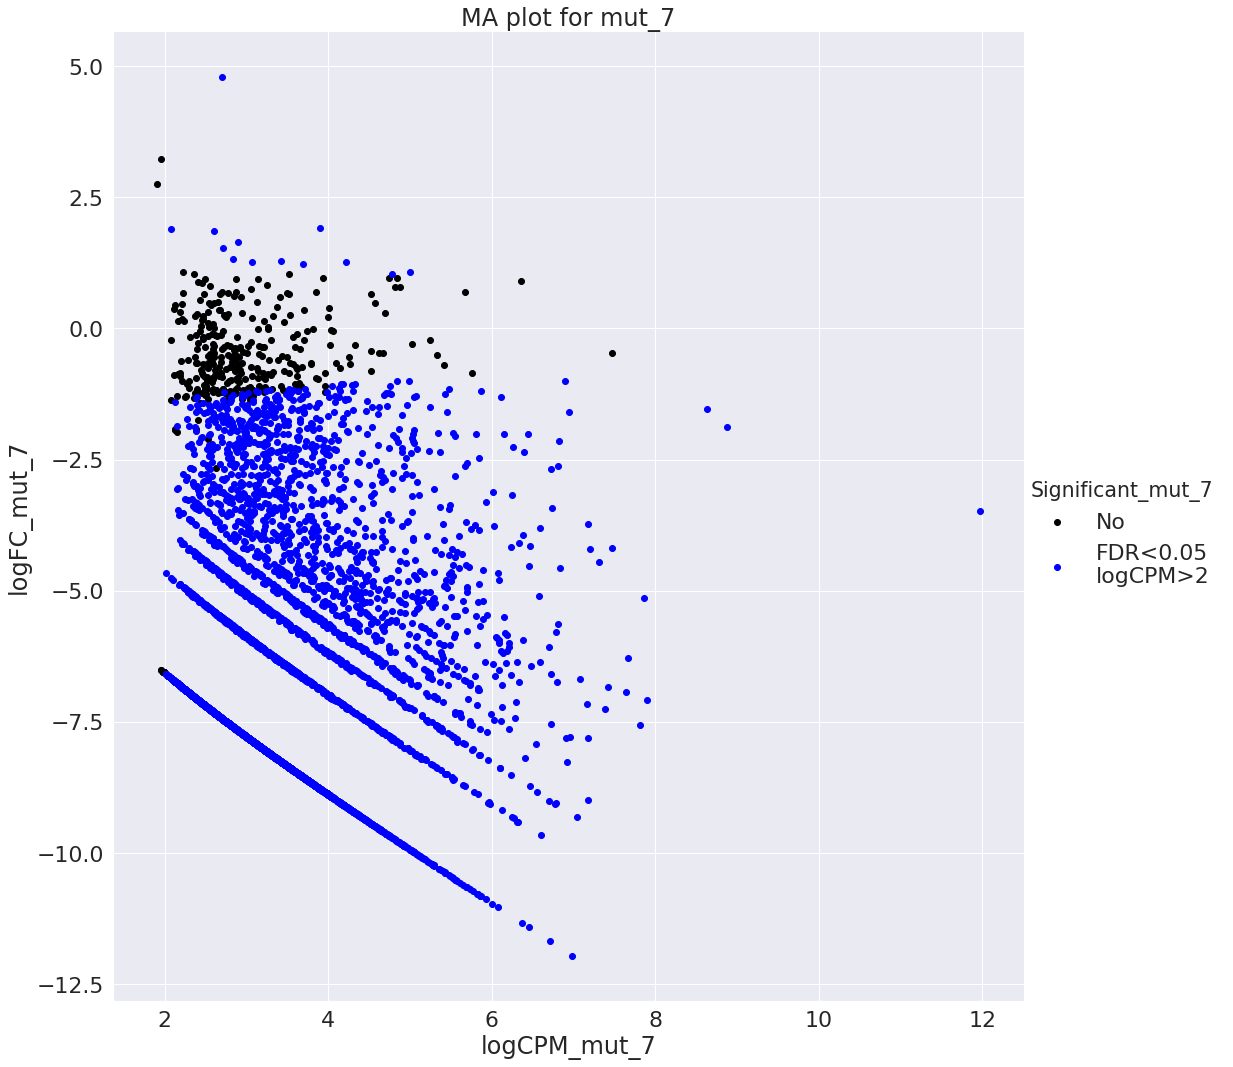

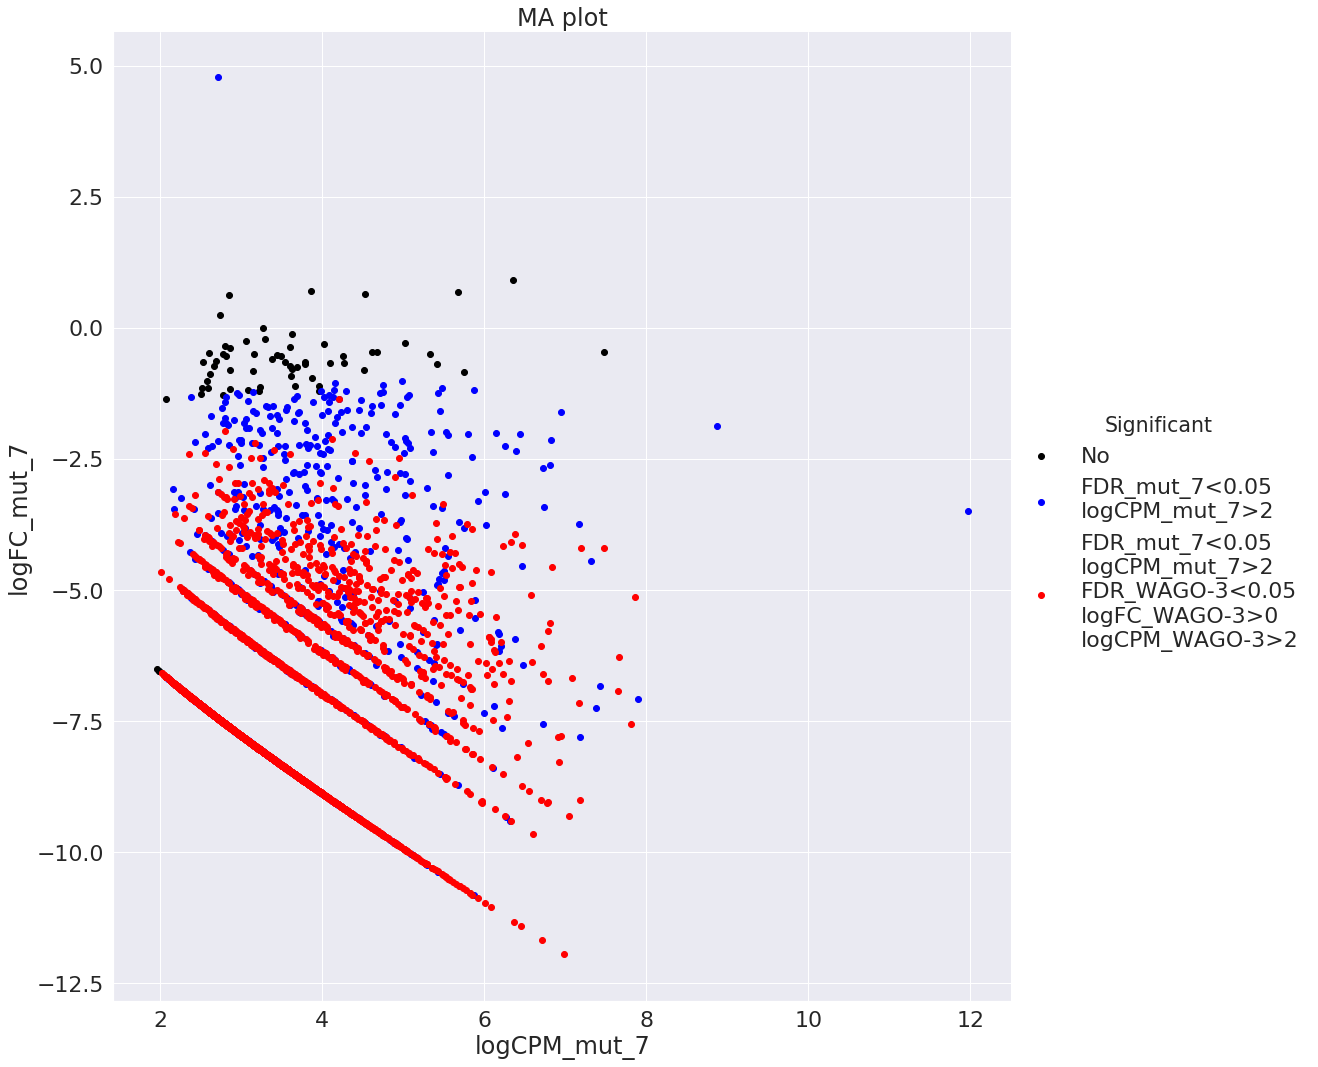

Significant
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_WAGO-3<0.05...         3344
FDR_mut_7<0.05\nlogCPM_mut_7>2                              851
No                                                           62

In [14]:
df_1_path = ip_path
df_2_path = mut_7_path
df_1_name = ip_name
df_2_name = mut_7_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

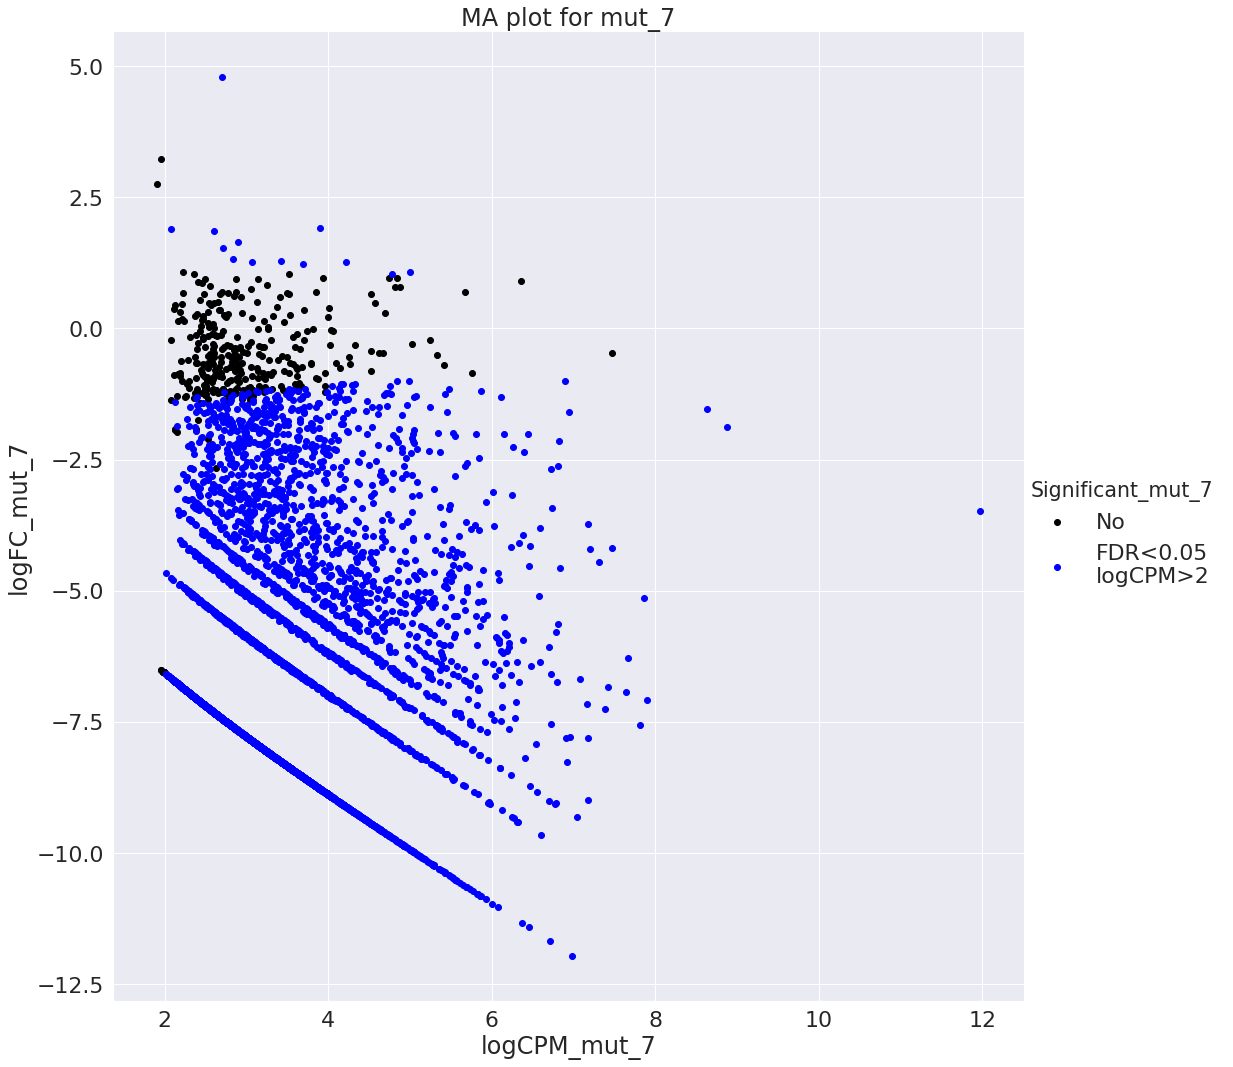

In [15]:
df = prepare_df(df_2_path, df_2_name)
df_name = df_2_name

sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05\nlogCPM>2"],
                      palette=["black", "blue"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot for {df_name}")

plt.savefig(f"plots/MA_{df_name}.pdf")
plt.show()

## 12. IP WAGO-9 vs Dpf_3_null

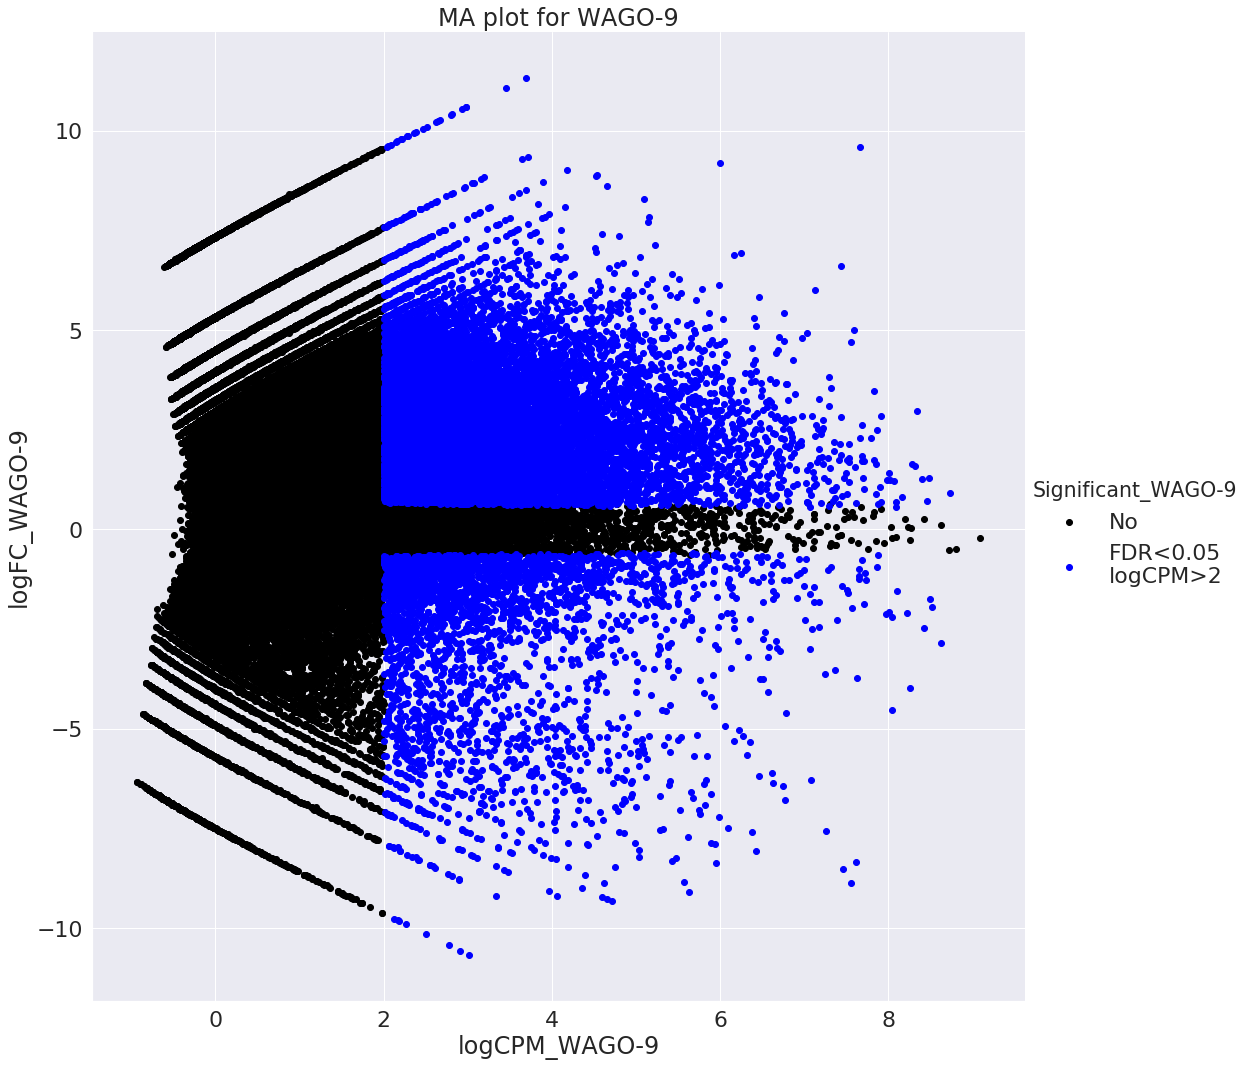

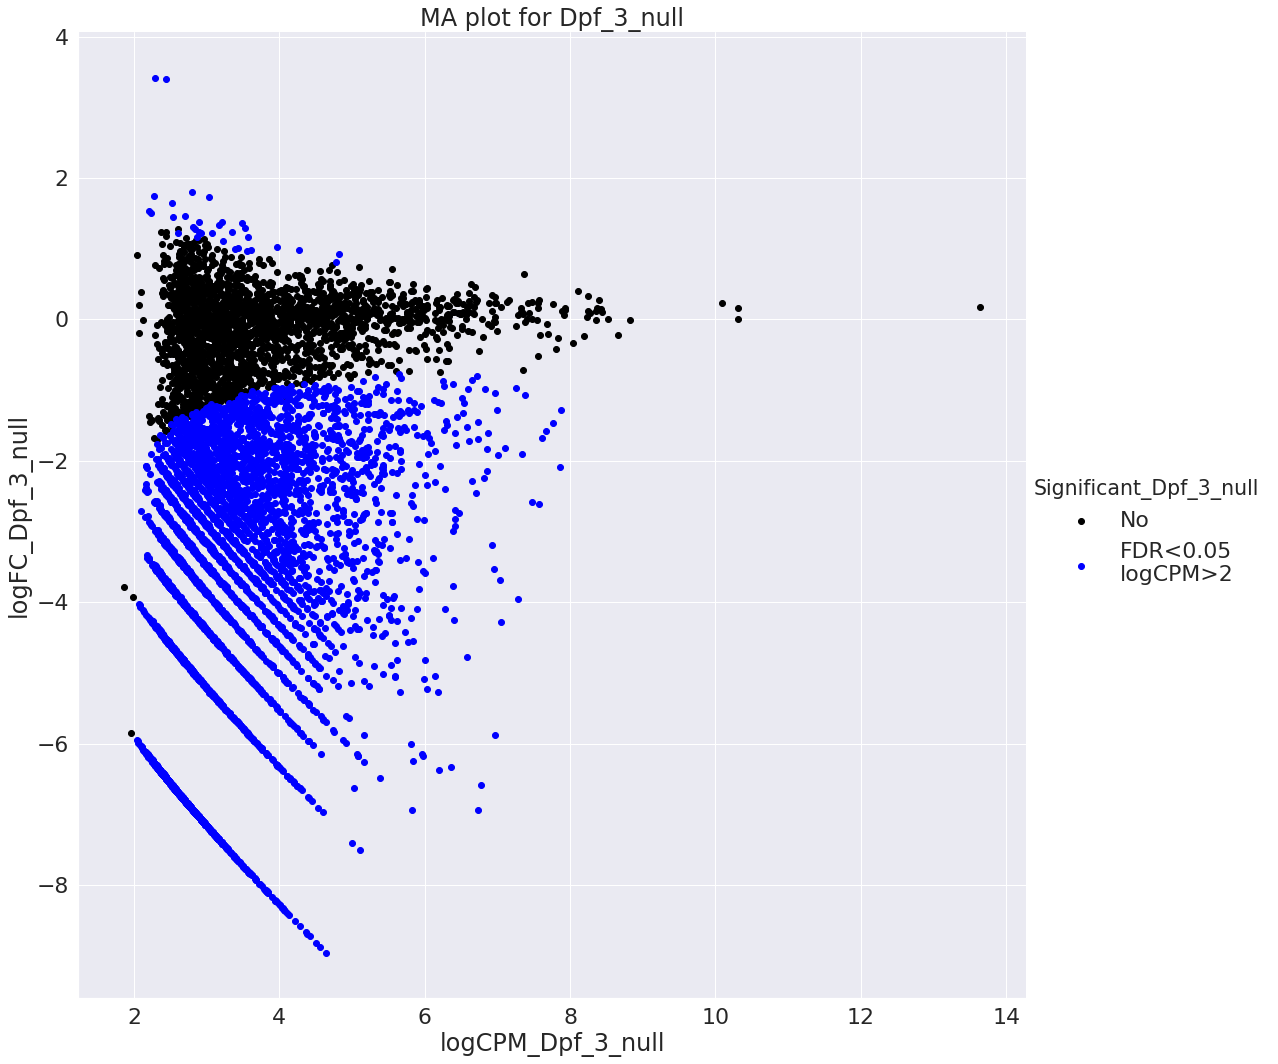

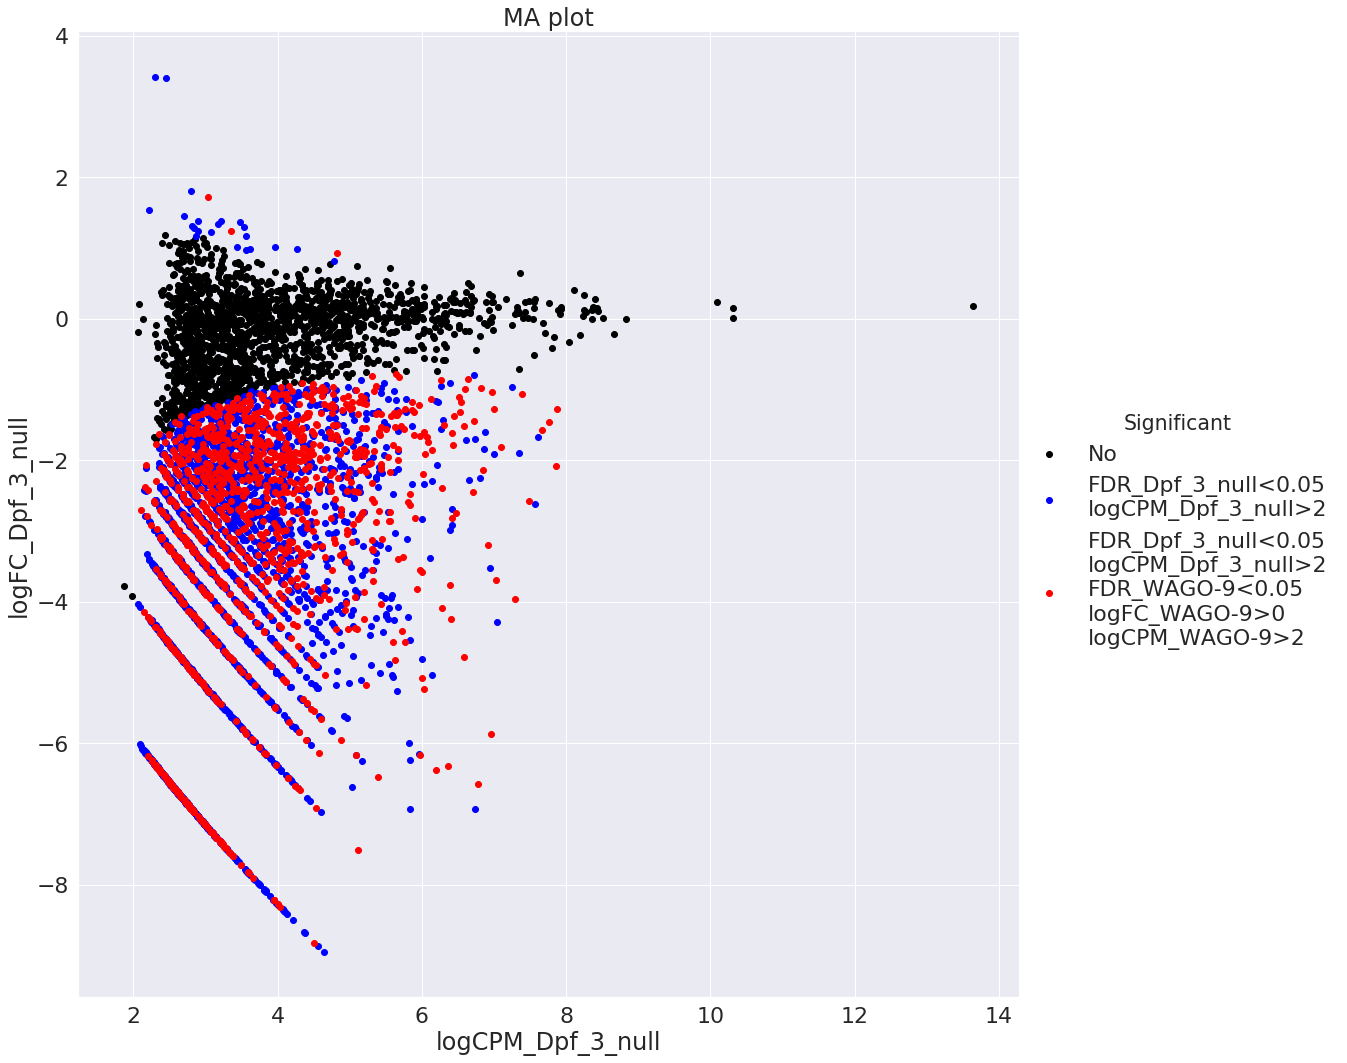

Significant
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                   2695
No                                                         1728
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_W...         1311

In [16]:
df_1_path = ip_wago_9_path
df_2_path = Dpf_3_null_path
df_1_name = ip_wago_9_name
df_2_name = Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 13. IP WAGO-9 vs Dpf_3_S784A

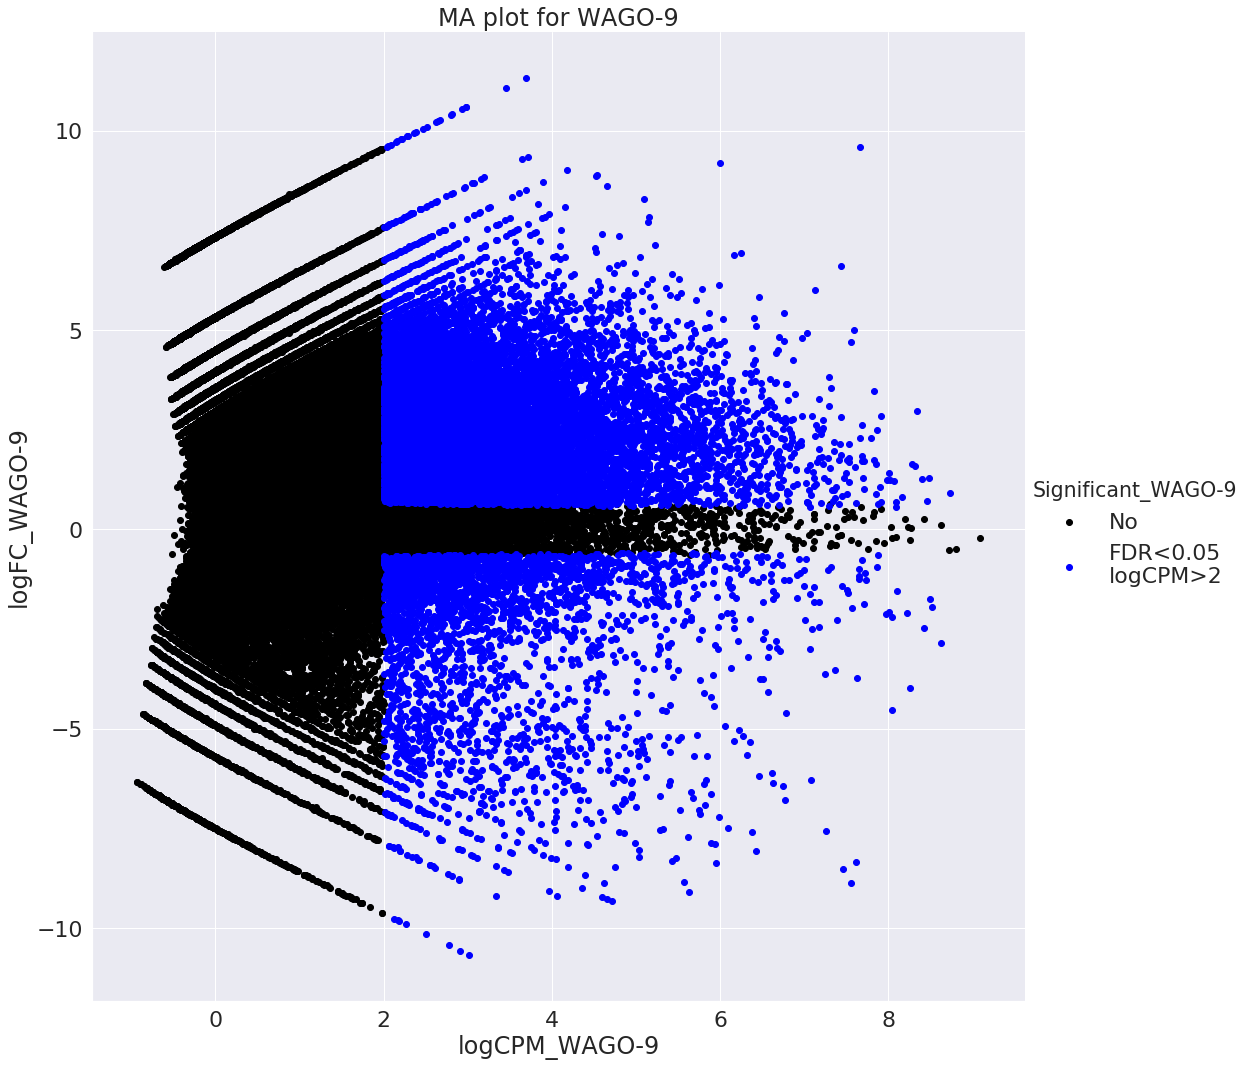

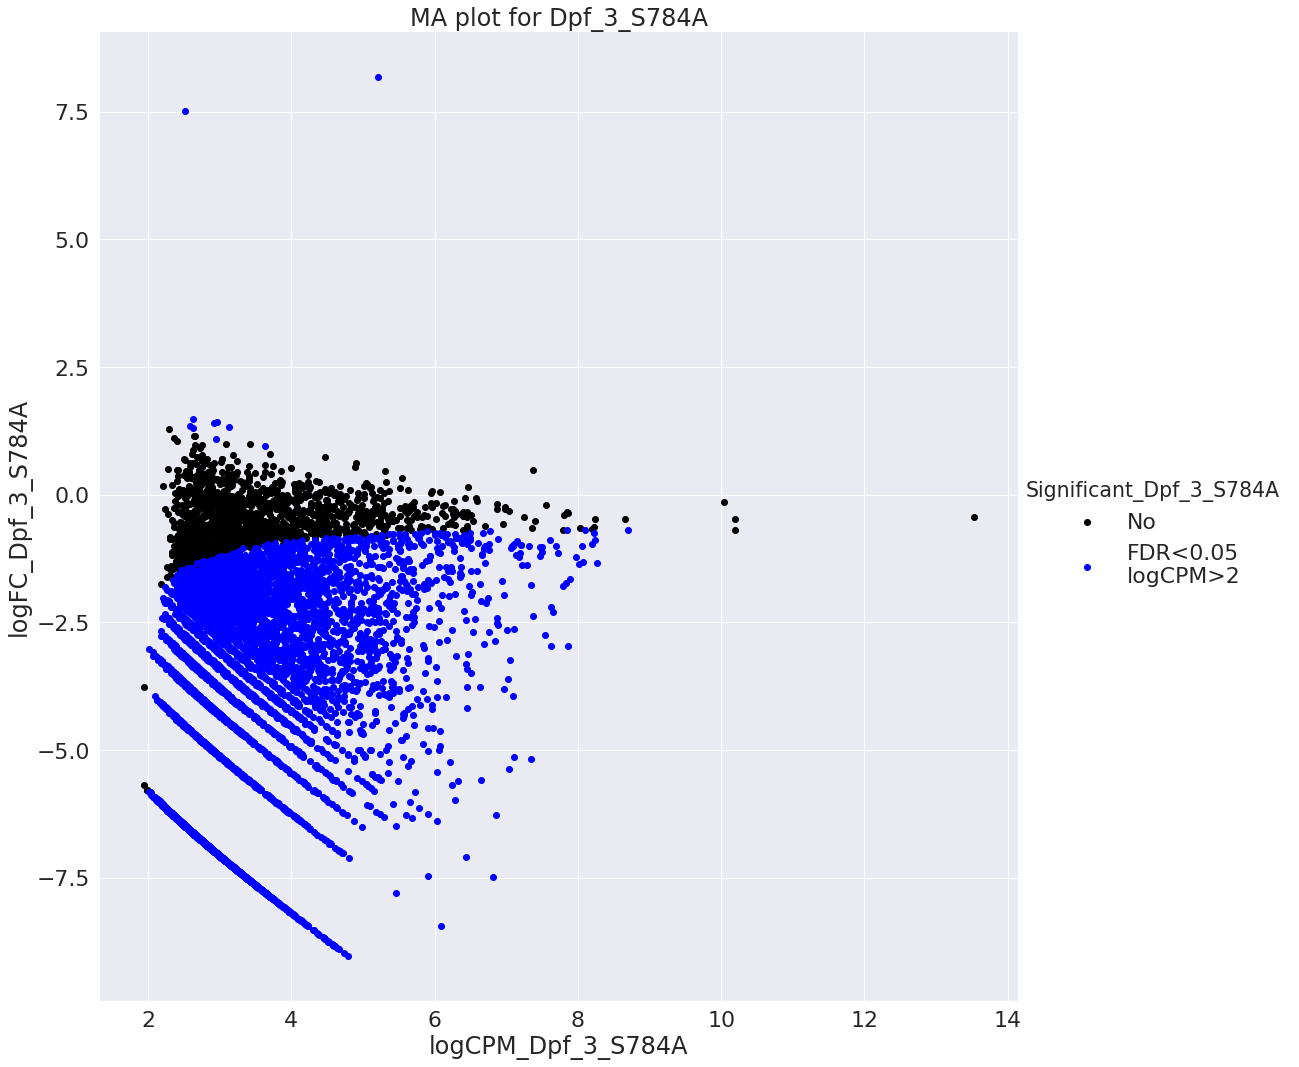

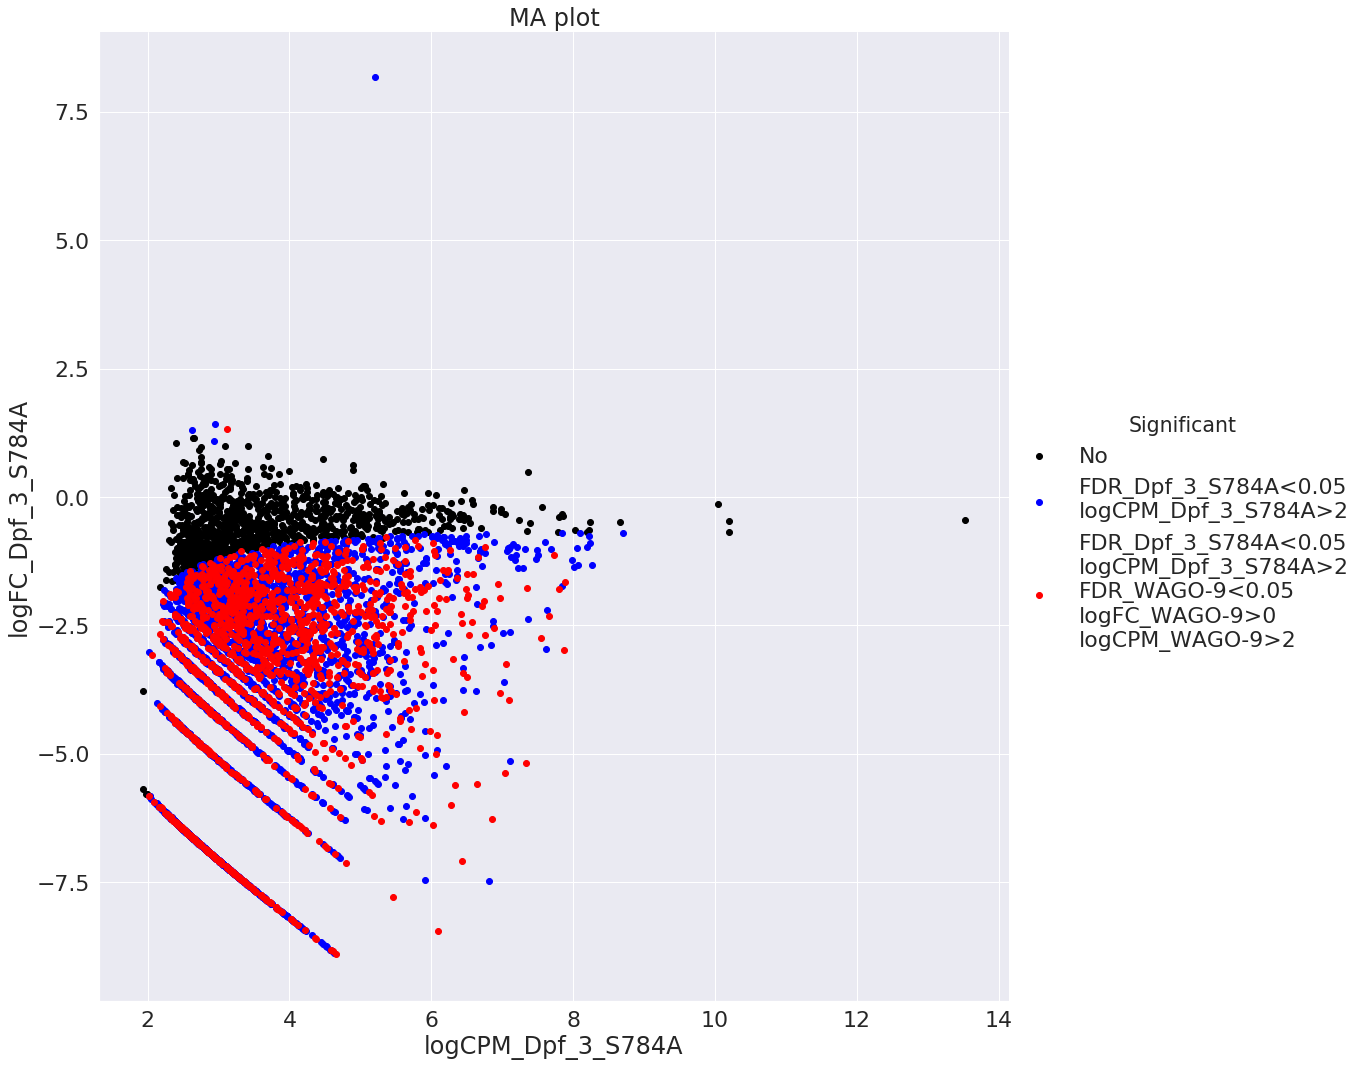

Significant
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                 3445
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR...         1587
No                                                         1005

In [17]:
df_1_path = ip_wago_9_path
df_2_path = Dpf_3_S784A_path
df_1_name = ip_wago_9_name
df_2_name = Dpf_3_S784A_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 14. IP WAGO-9 vs mut_2

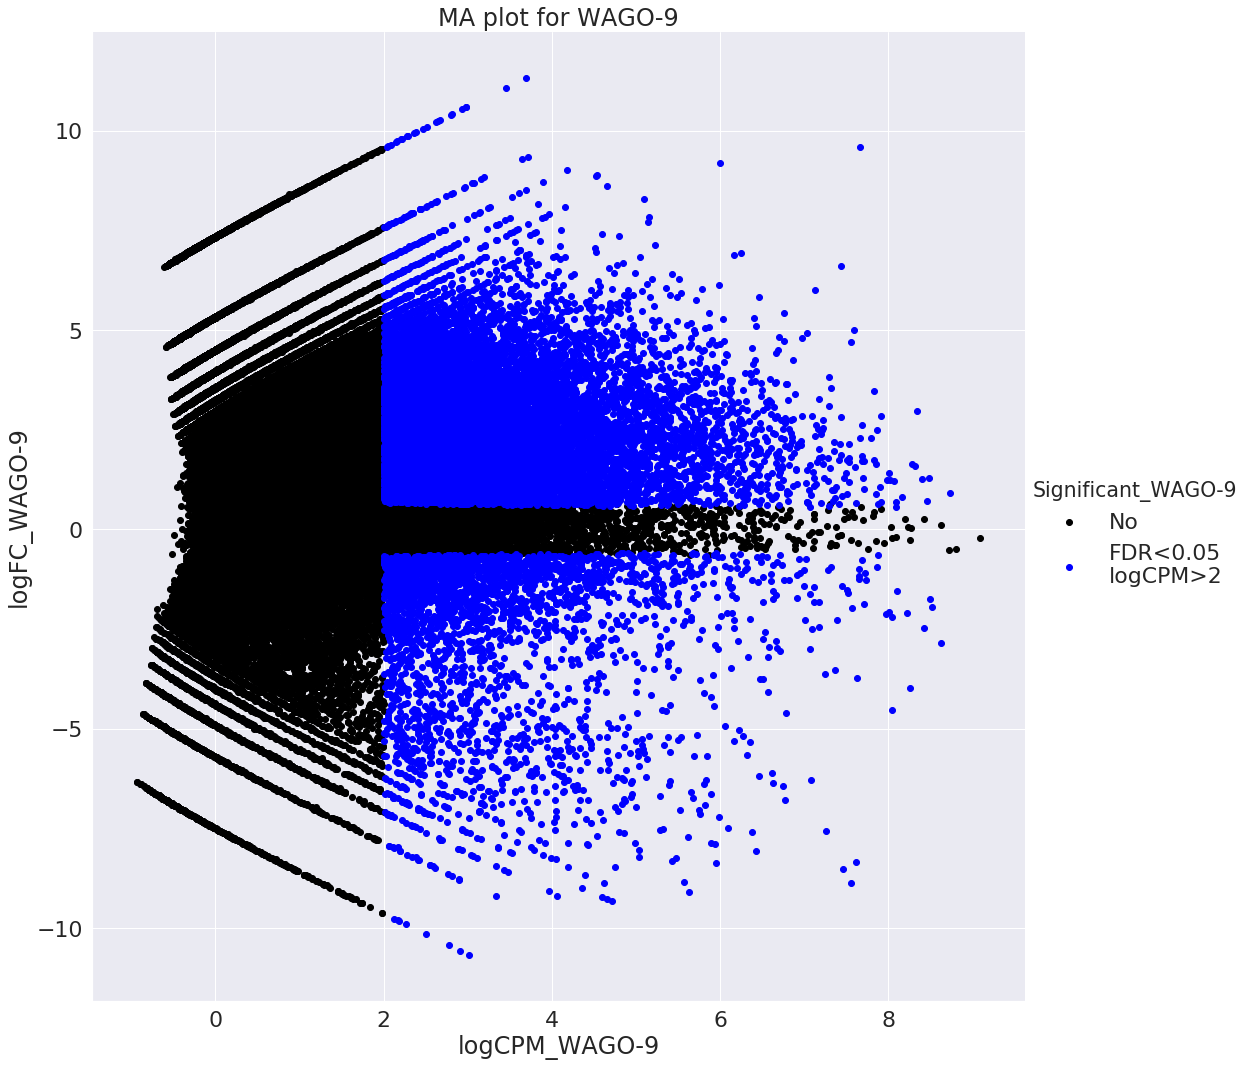

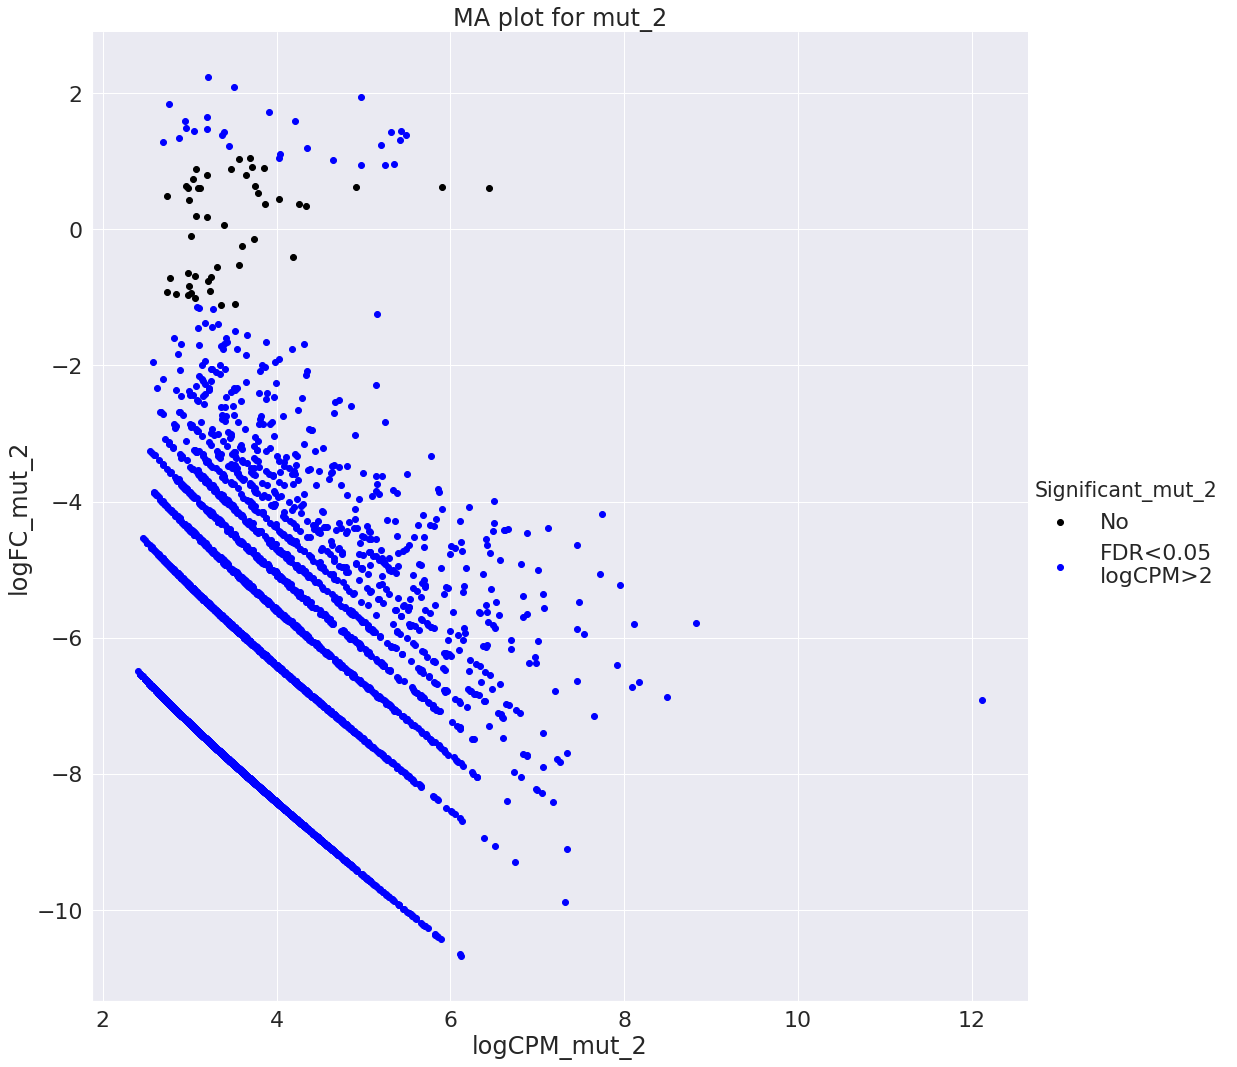

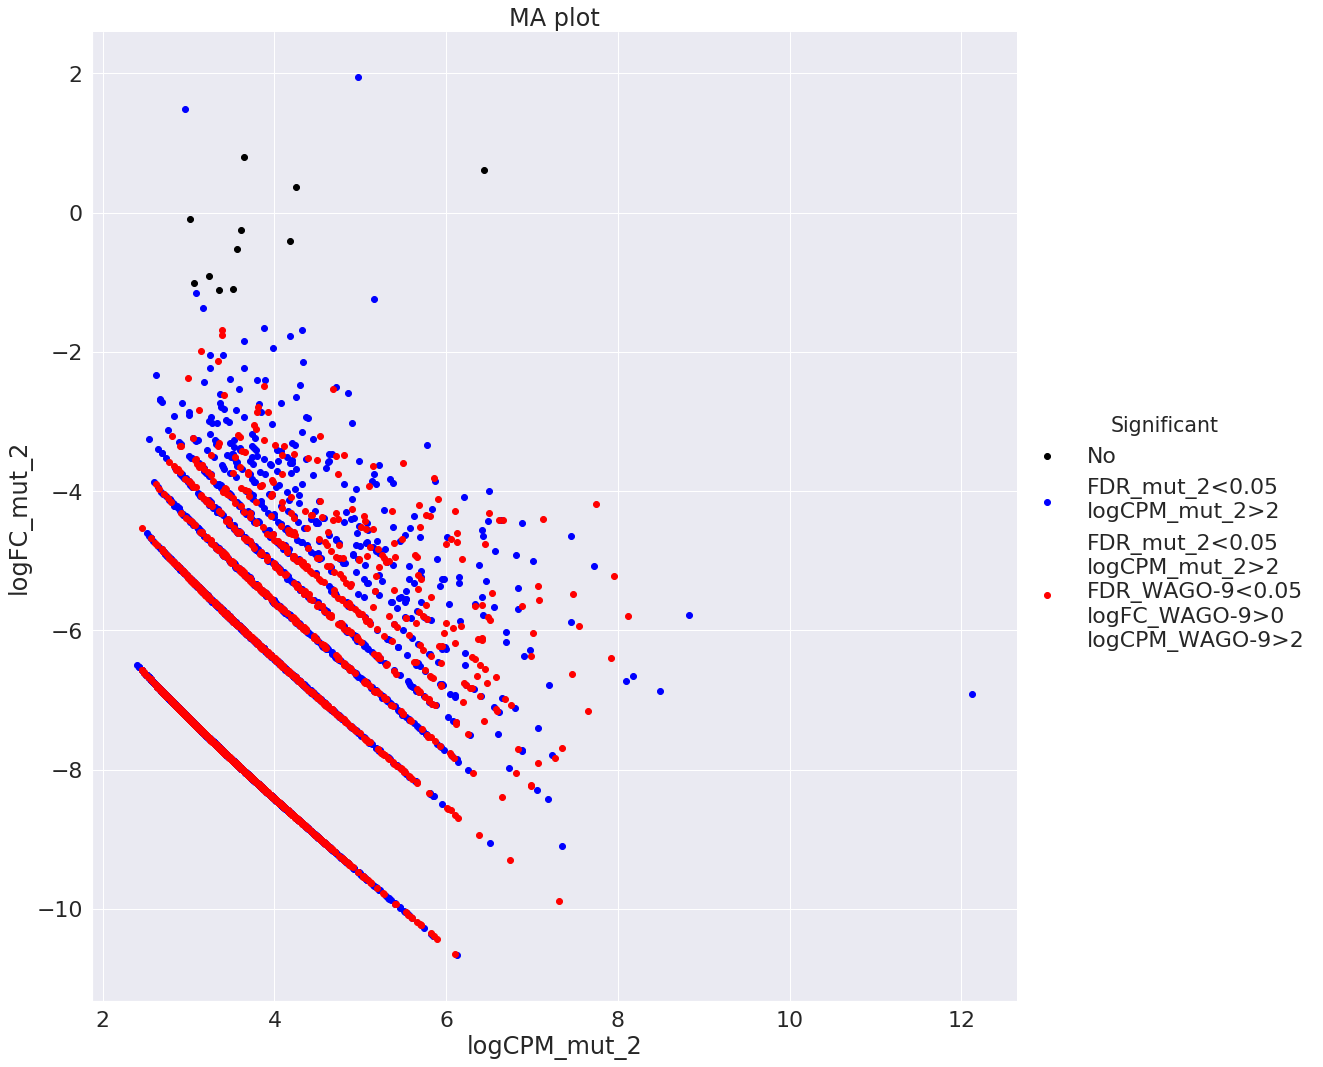

Significant
FDR_mut_2<0.05\nlogCPM_mut_2>2                             2966
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-9<0.05...         1654
No                                                           11

In [18]:
df_1_path = ip_wago_9_path
df_2_path = mut_2_path
df_1_name = ip_wago_9_name
df_2_name = mut_2_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 15. IP WAGO-9 vs mut_7

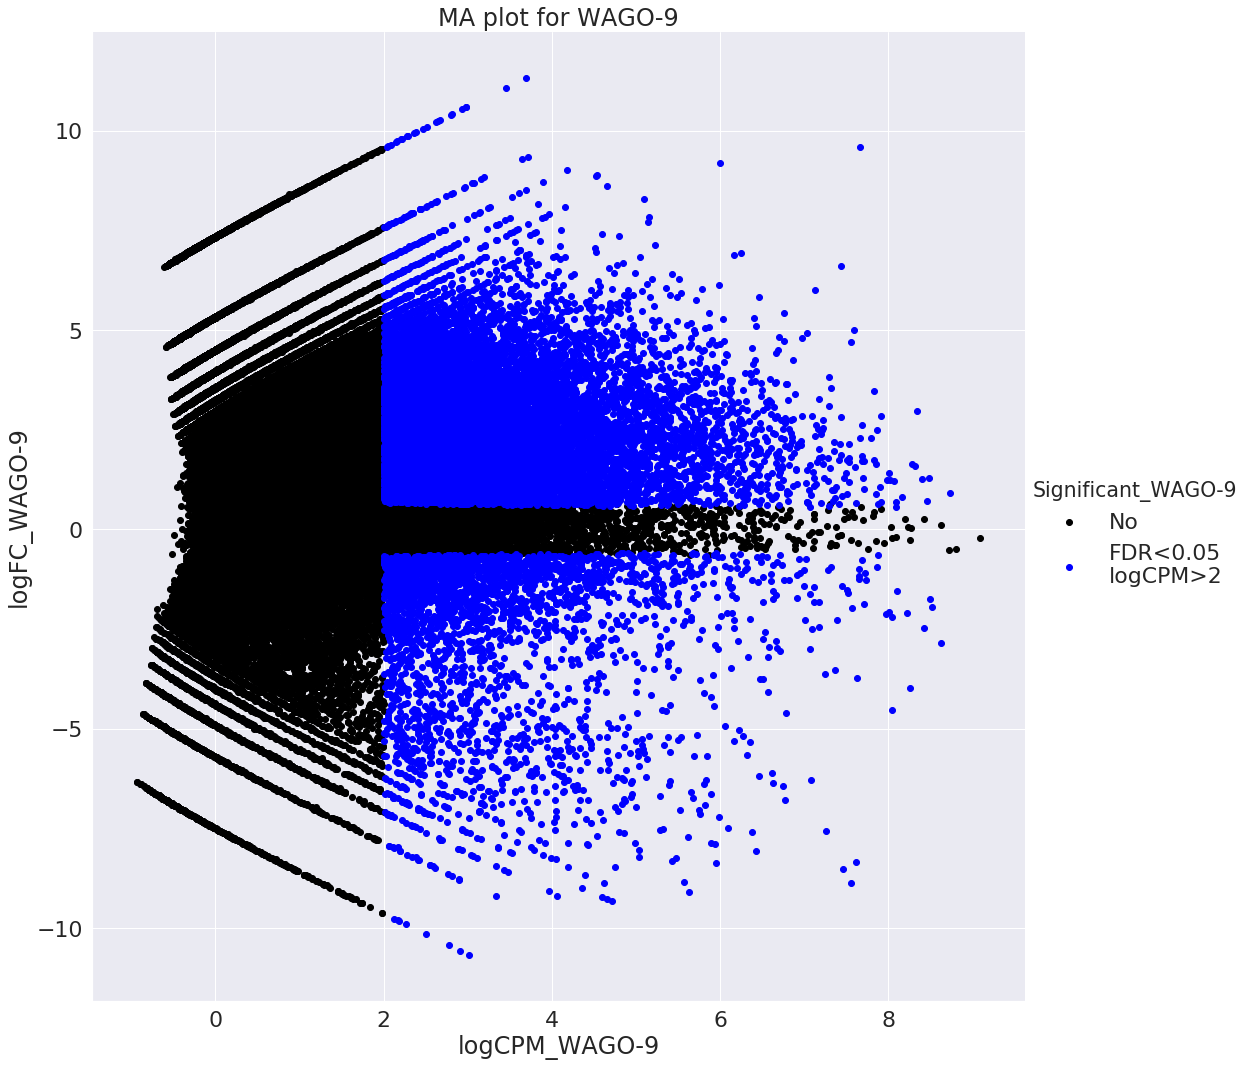

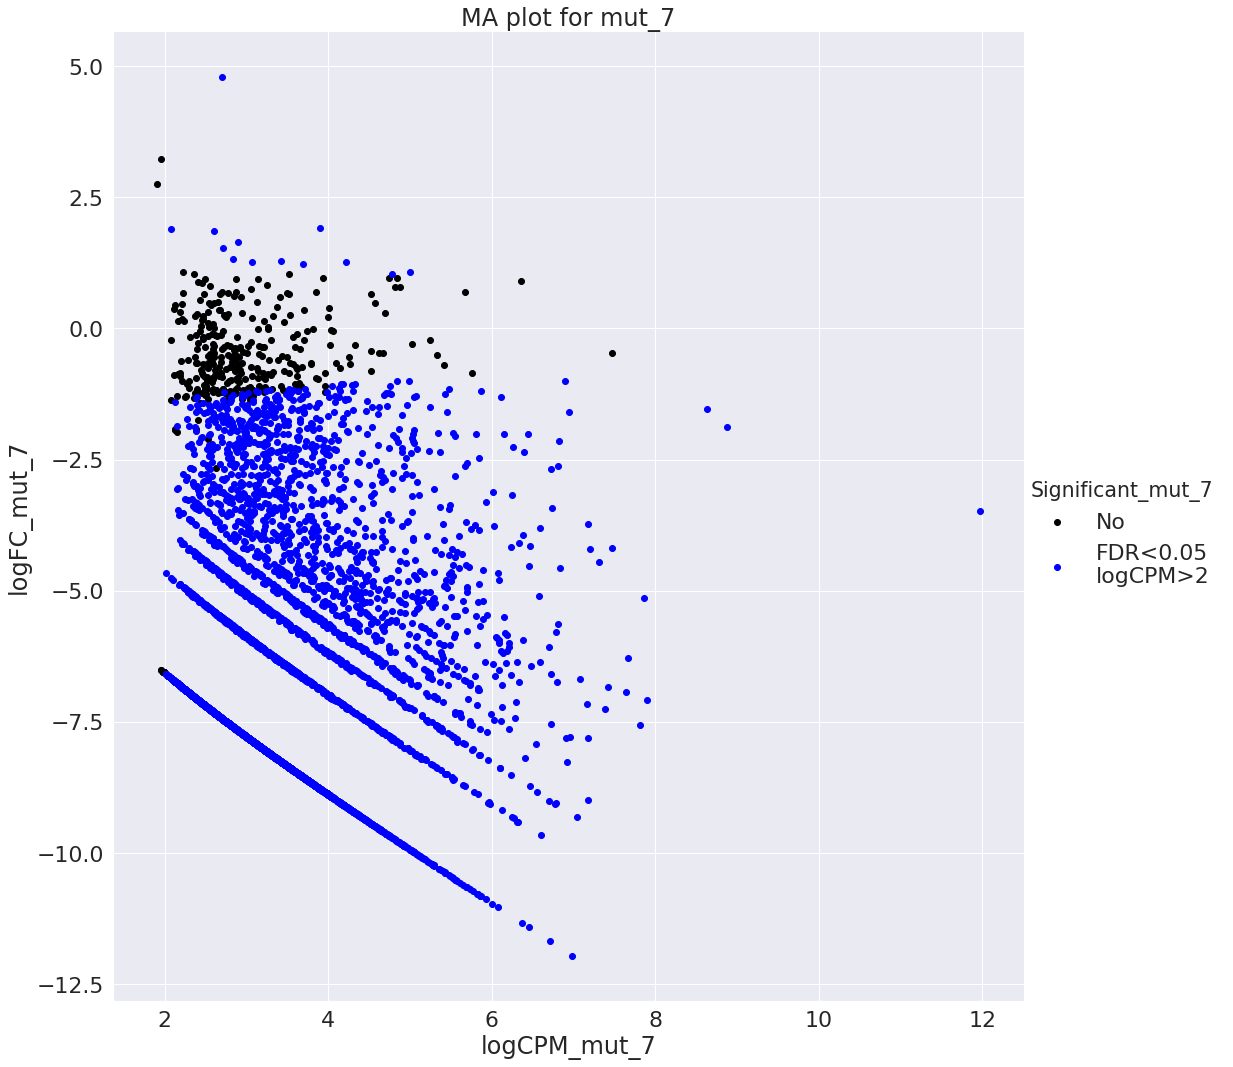

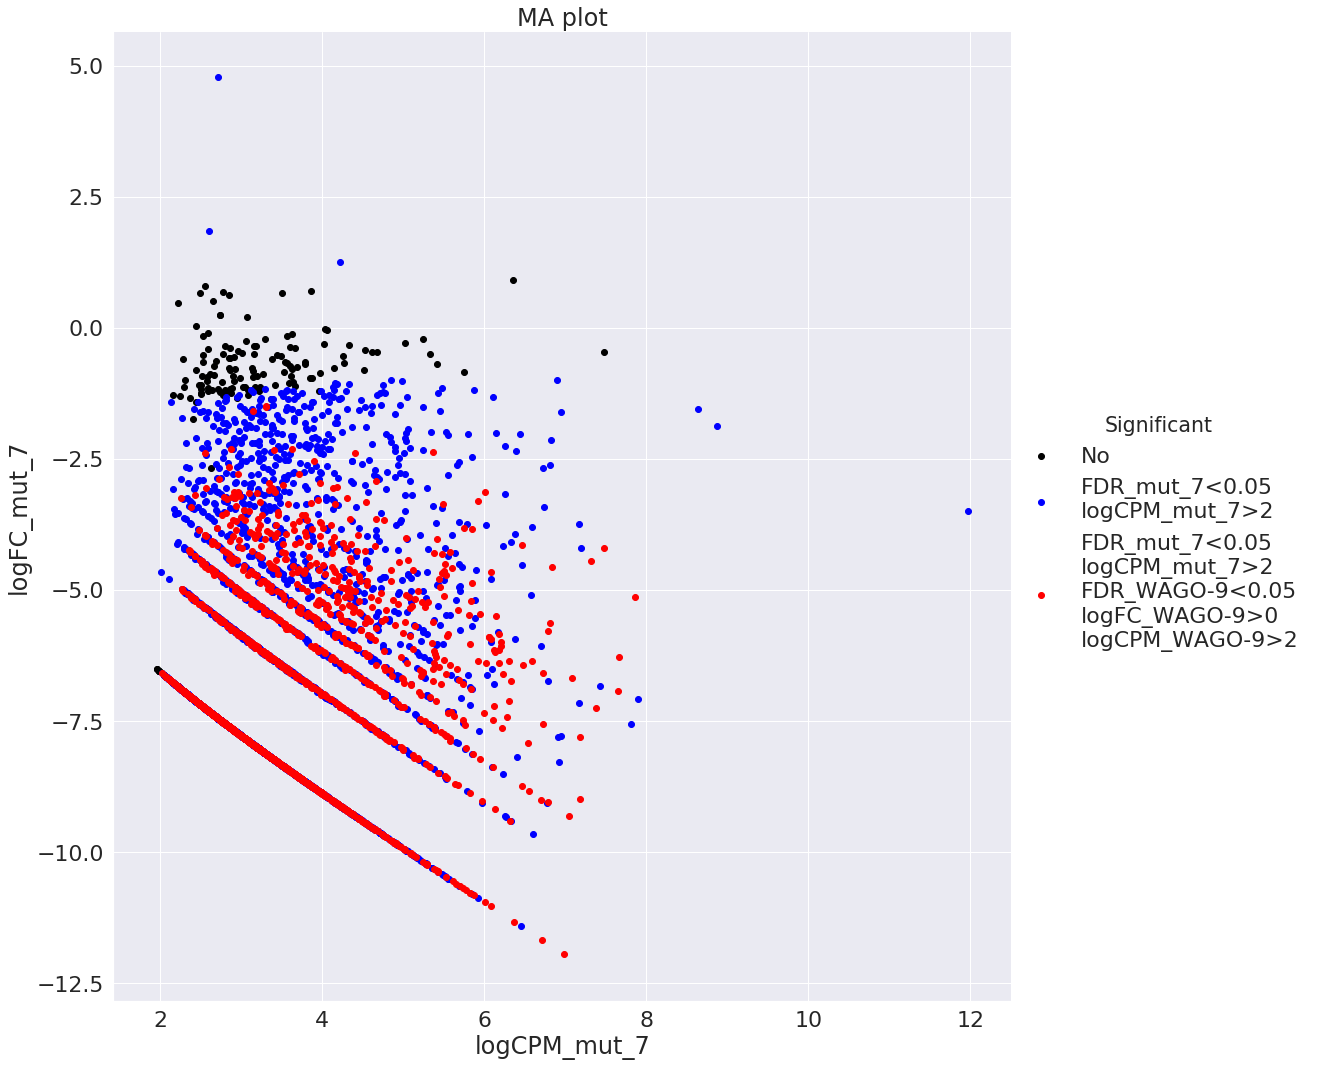

Significant
FDR_mut_7<0.05\nlogCPM_mut_7>2                             3193
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_WAGO-9<0.05...         1751
No                                                          133

In [19]:
df_1_path = ip_wago_9_path
df_2_path = mut_7_path
df_1_name = ip_wago_9_name
df_2_name = mut_7_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 16. IP crs-1 vs Dpf_3_null

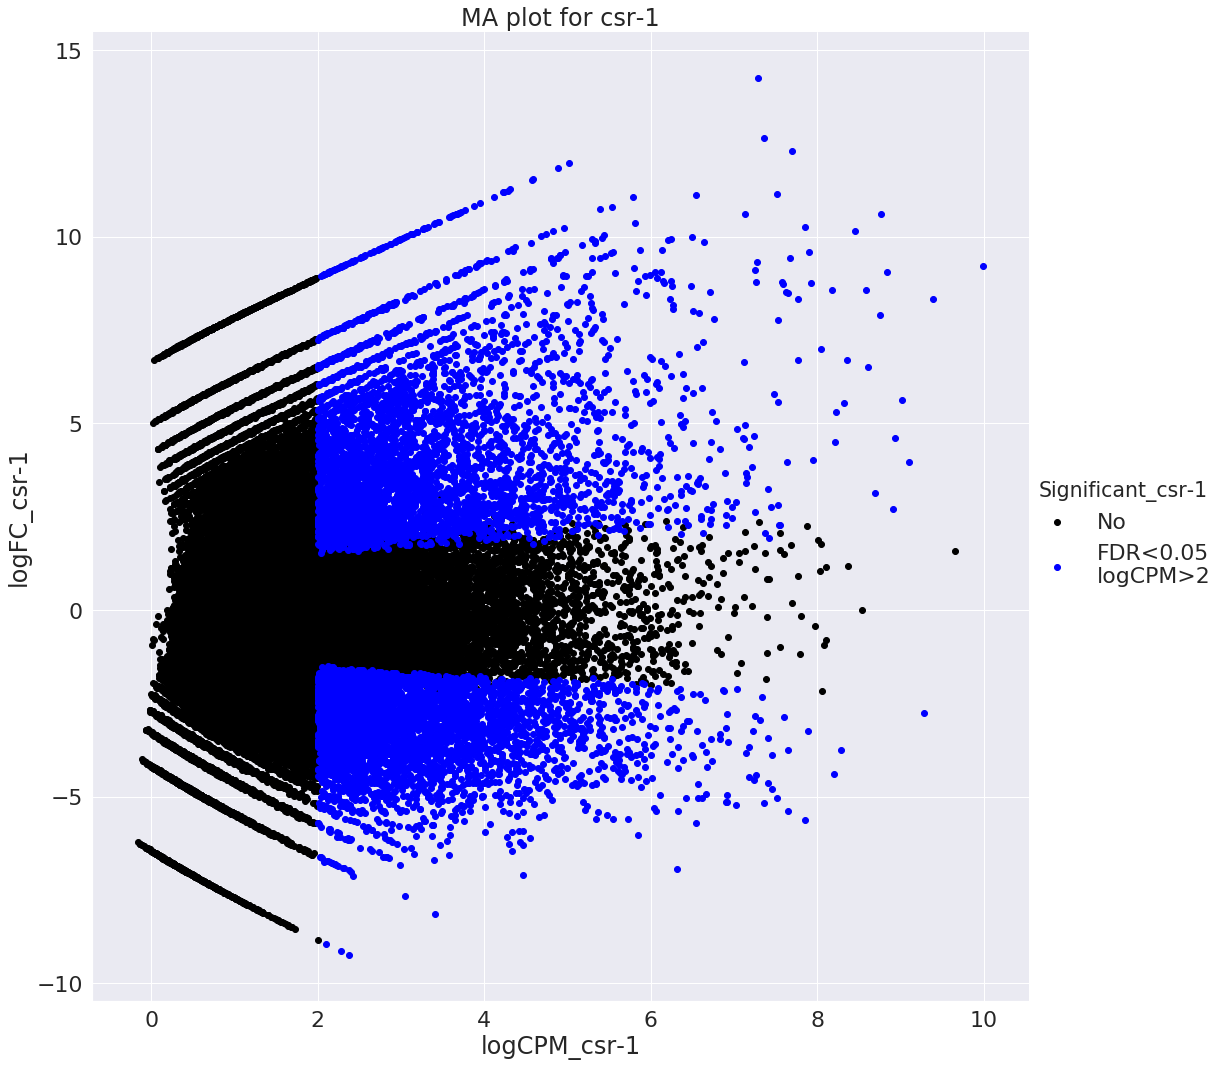

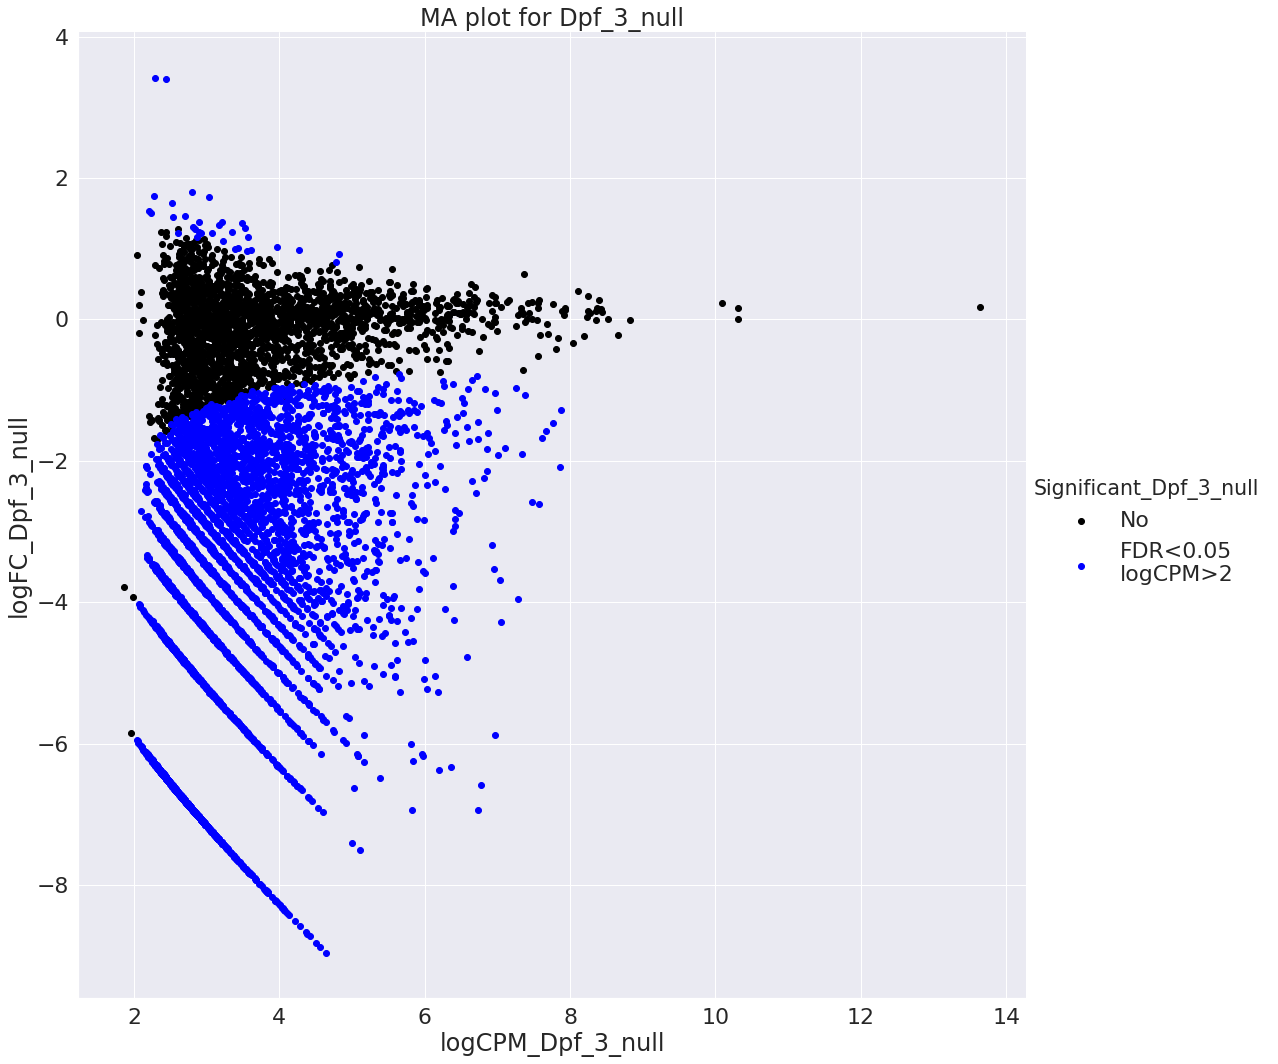

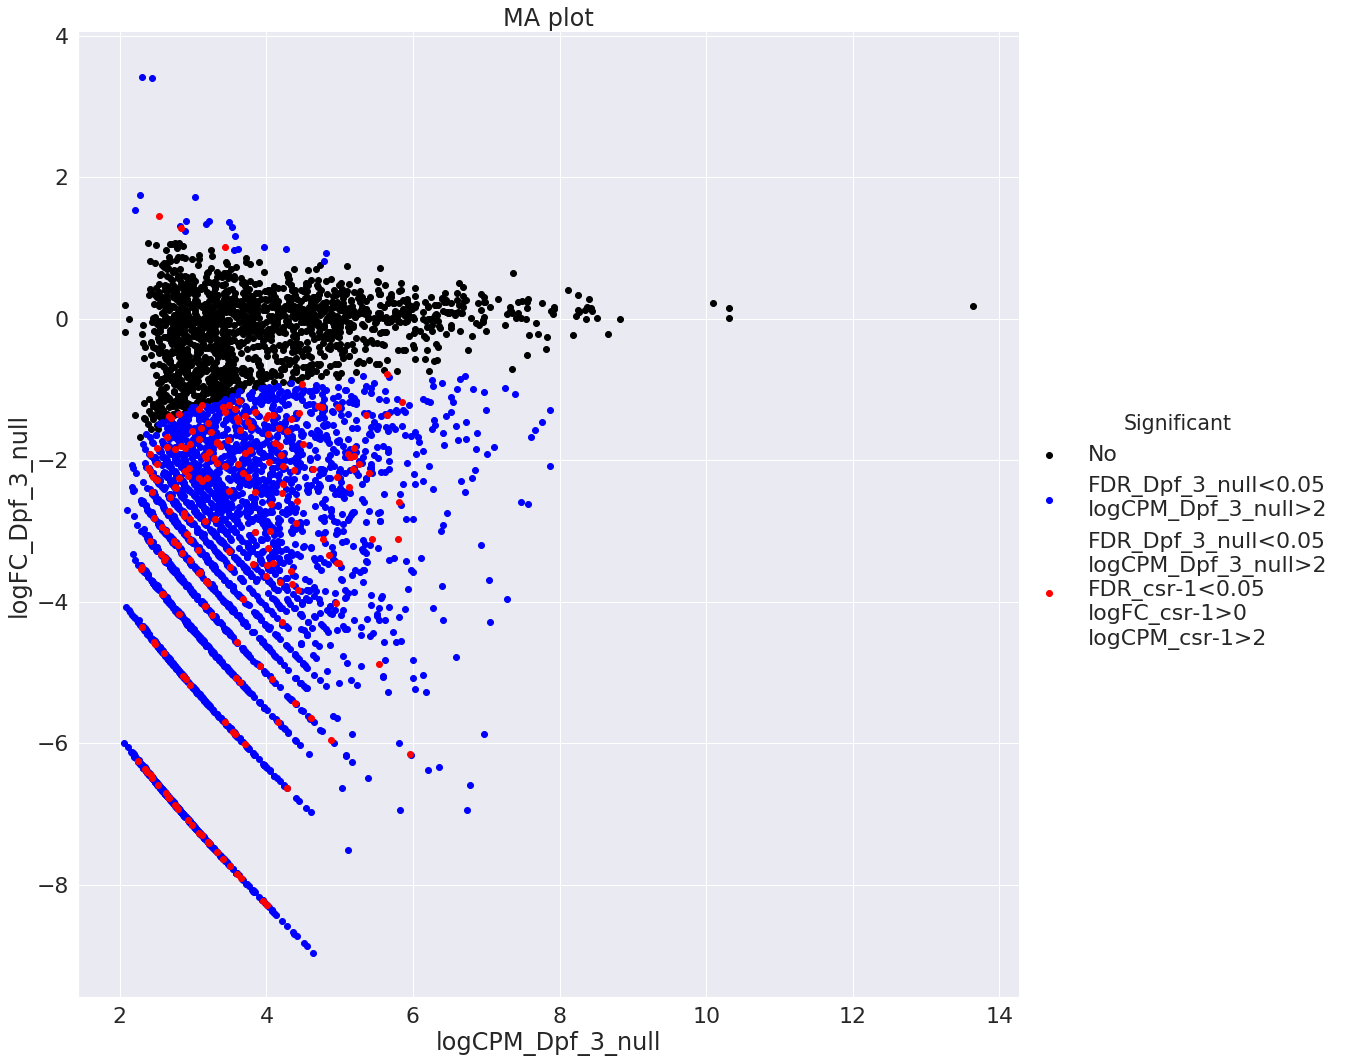

Significant
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                   3363
No                                                         1581
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_c...          208

In [20]:
df_1_path = ip_csr_1_path
df_2_path = Dpf_3_null_path
df_1_name = ip_csr_1_name
df_2_name = Dpf_3_null_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 17. IP crs-1 vs Dpf_3_S784A

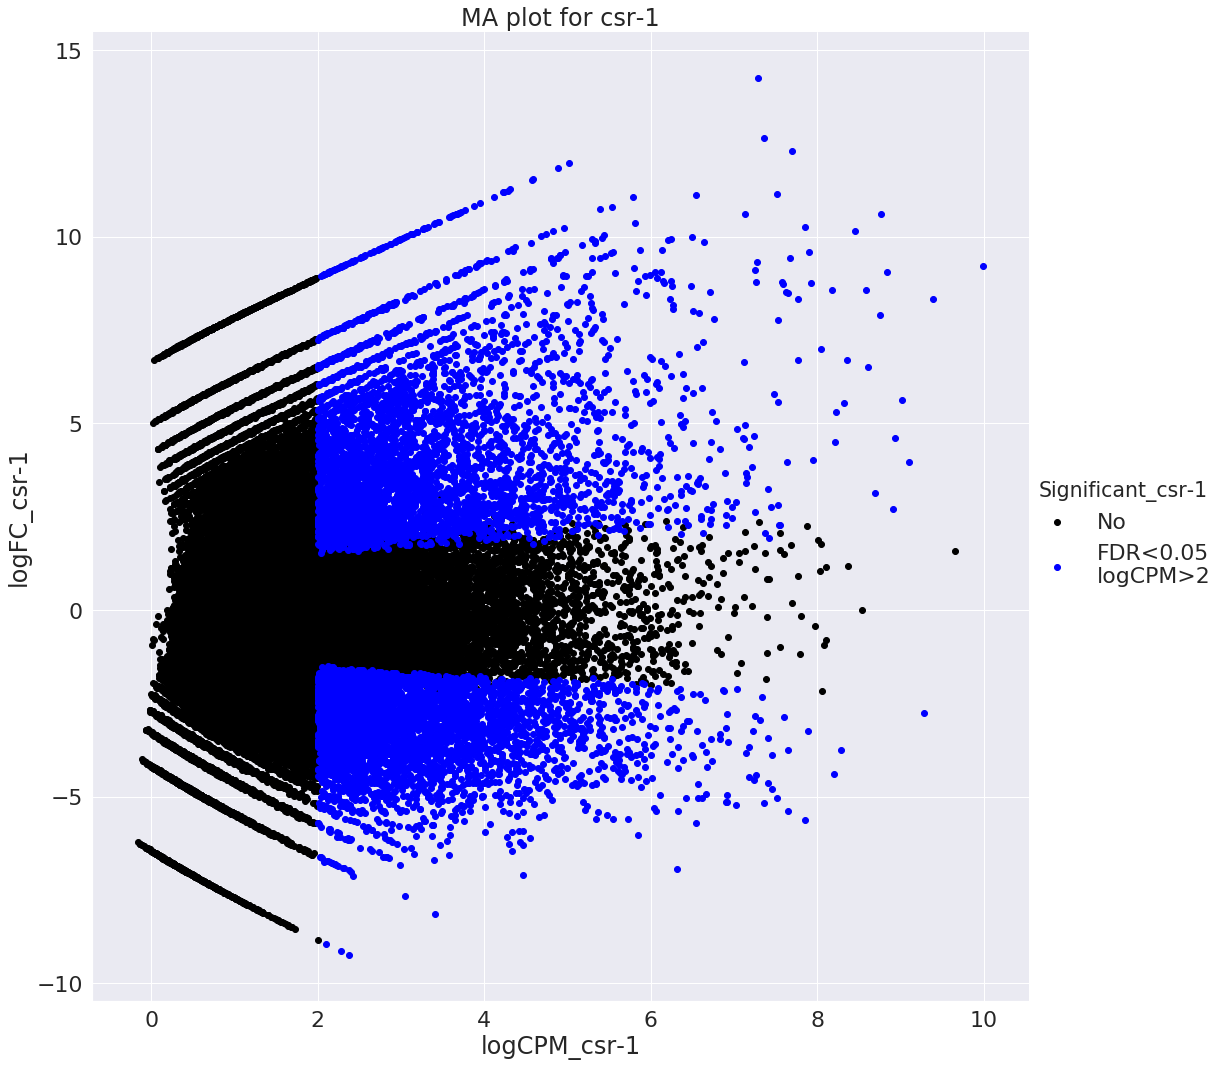

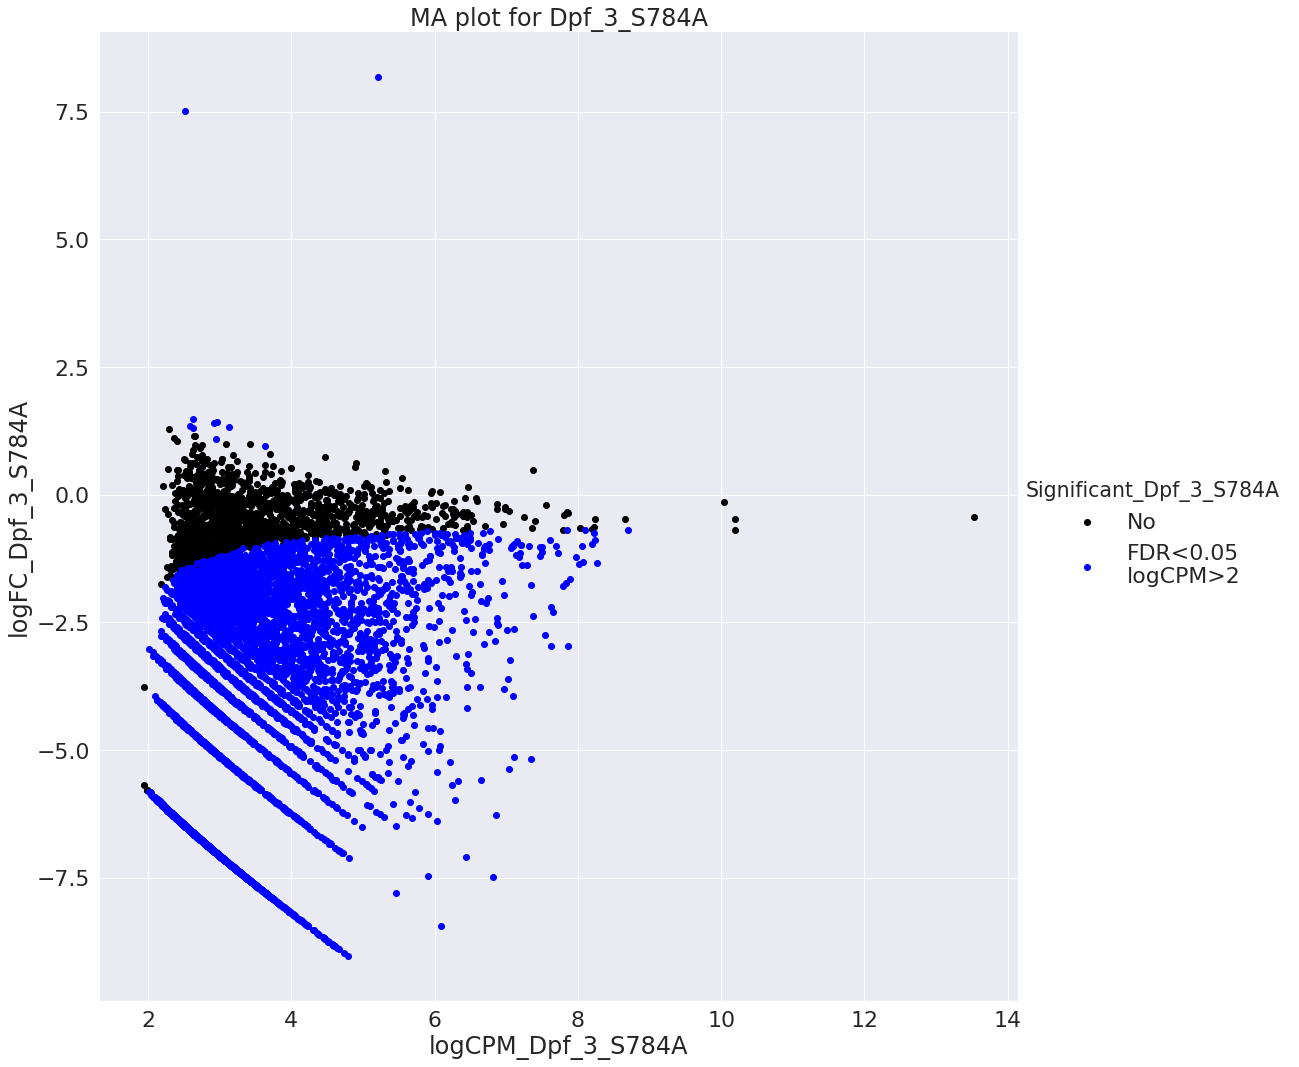

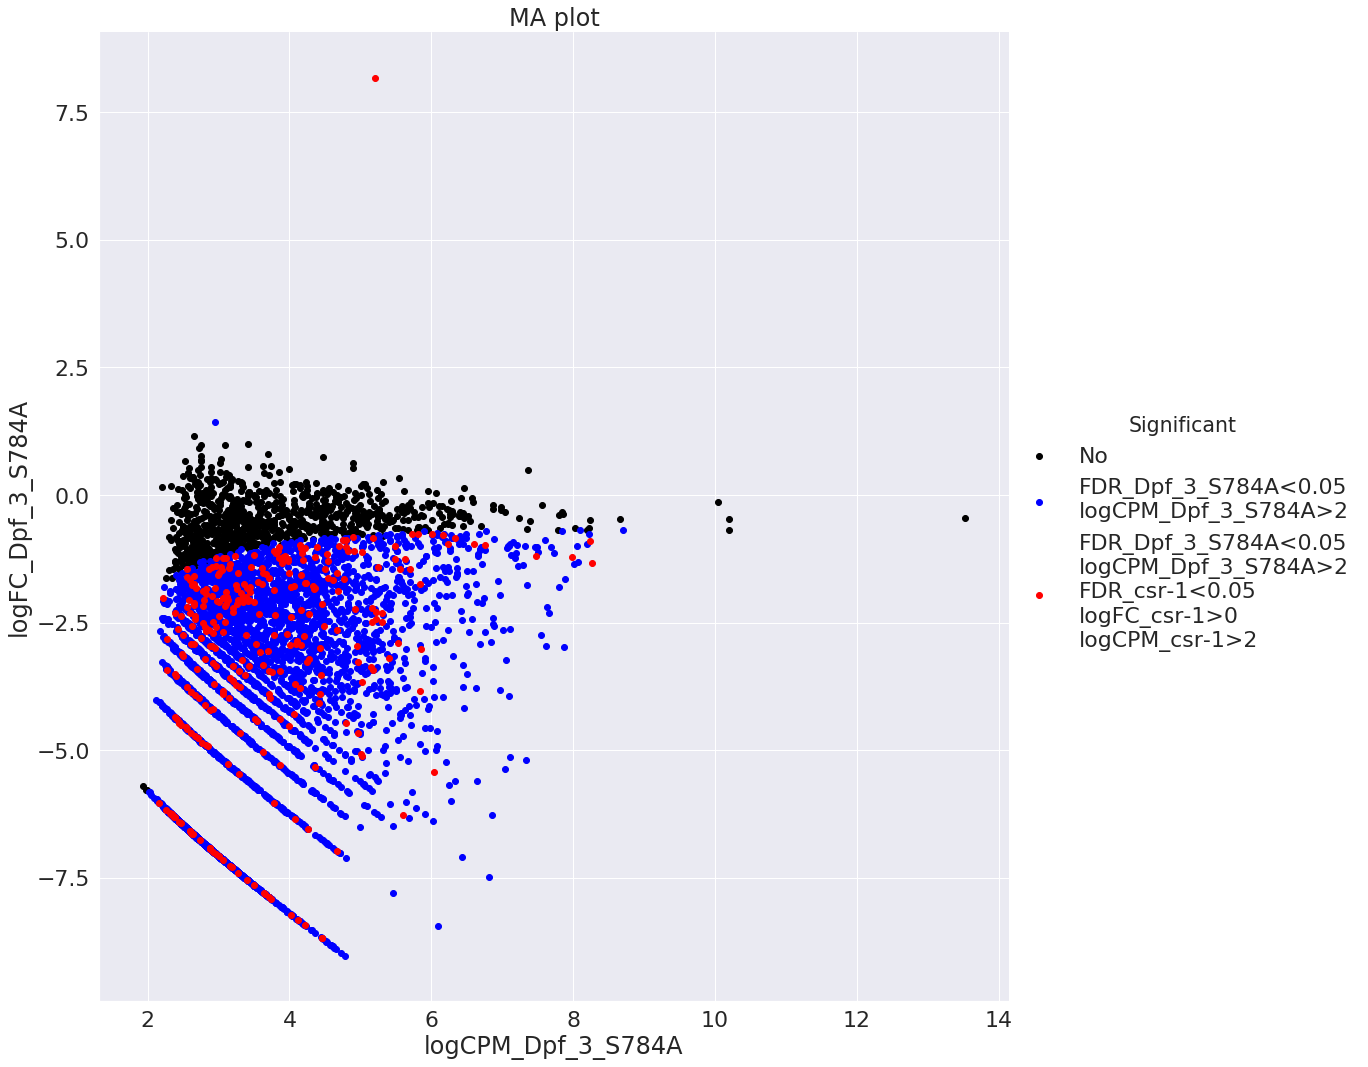

Significant
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                 4139
No                                                          912
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR...          309

In [21]:
df_1_path = ip_csr_1_path
df_2_path = Dpf_3_S784A_path
df_1_name = ip_csr_1_name
df_2_name = Dpf_3_S784A_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 18. IP crs-1 vs mut_2

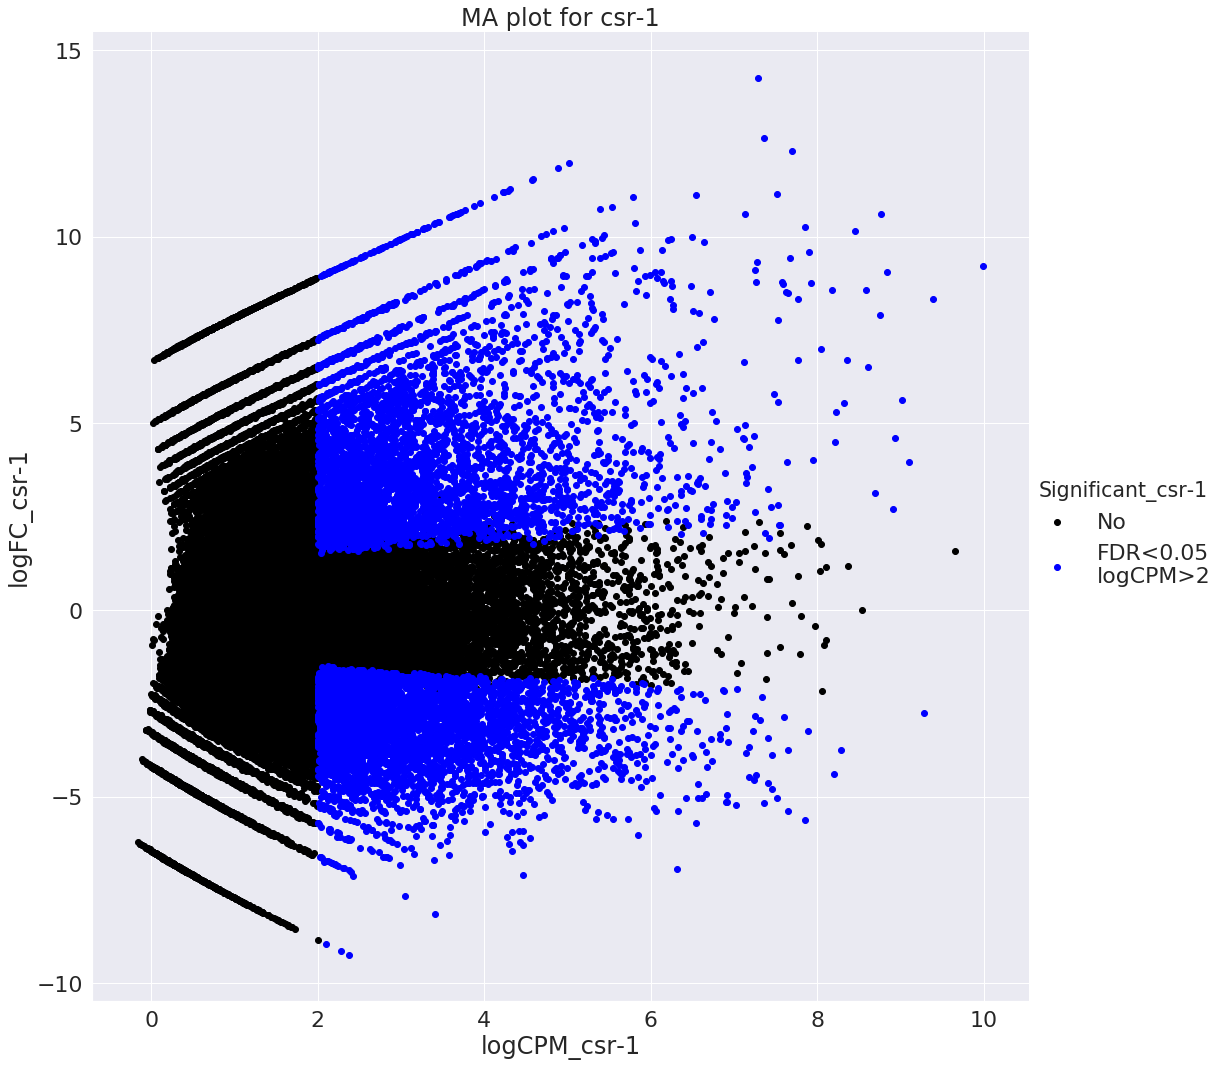

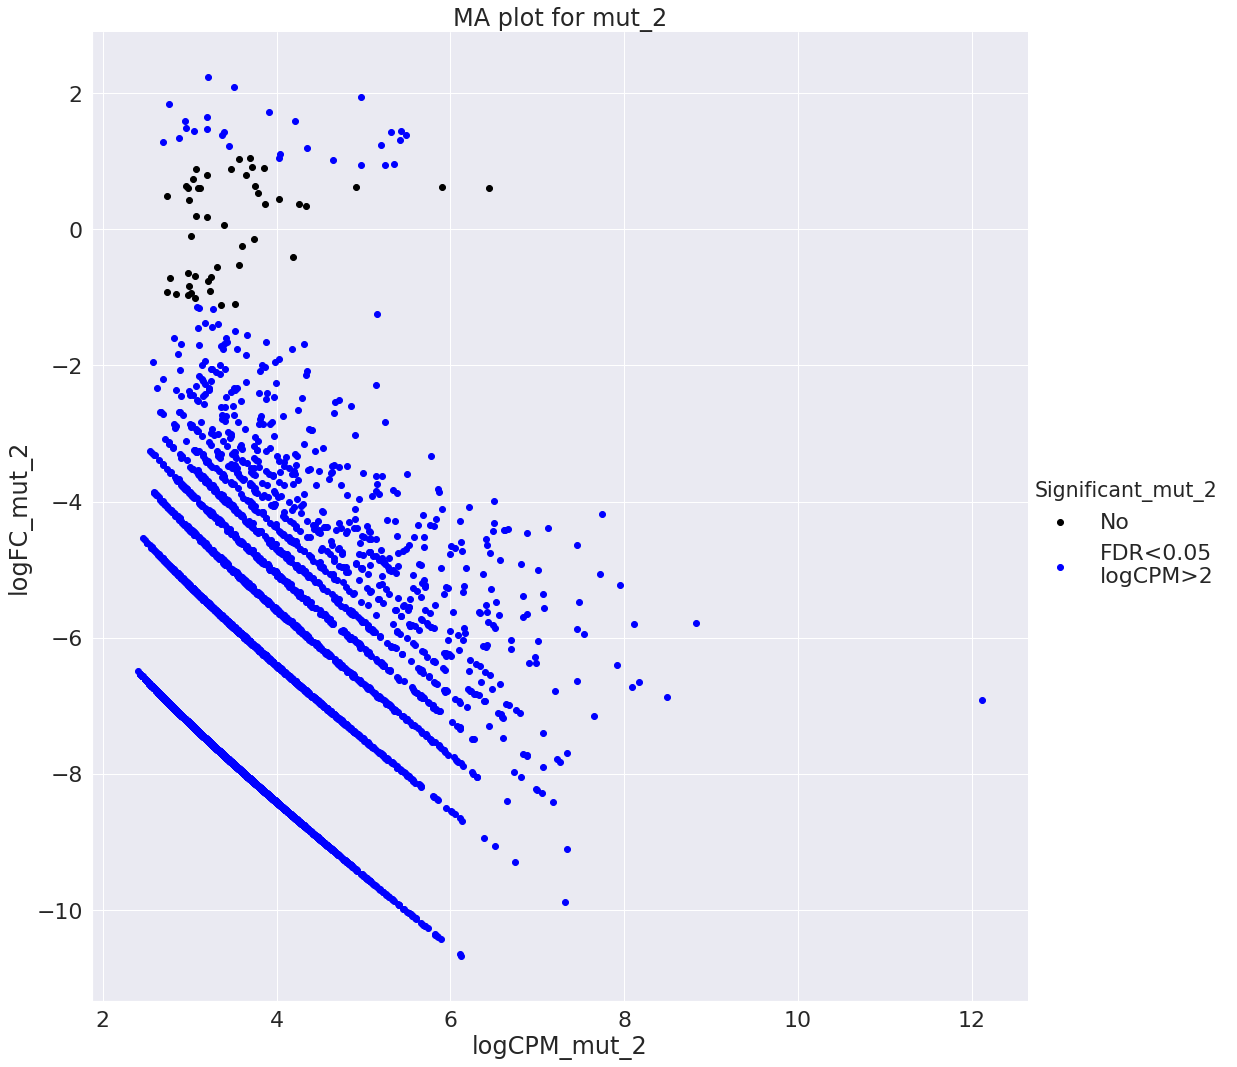

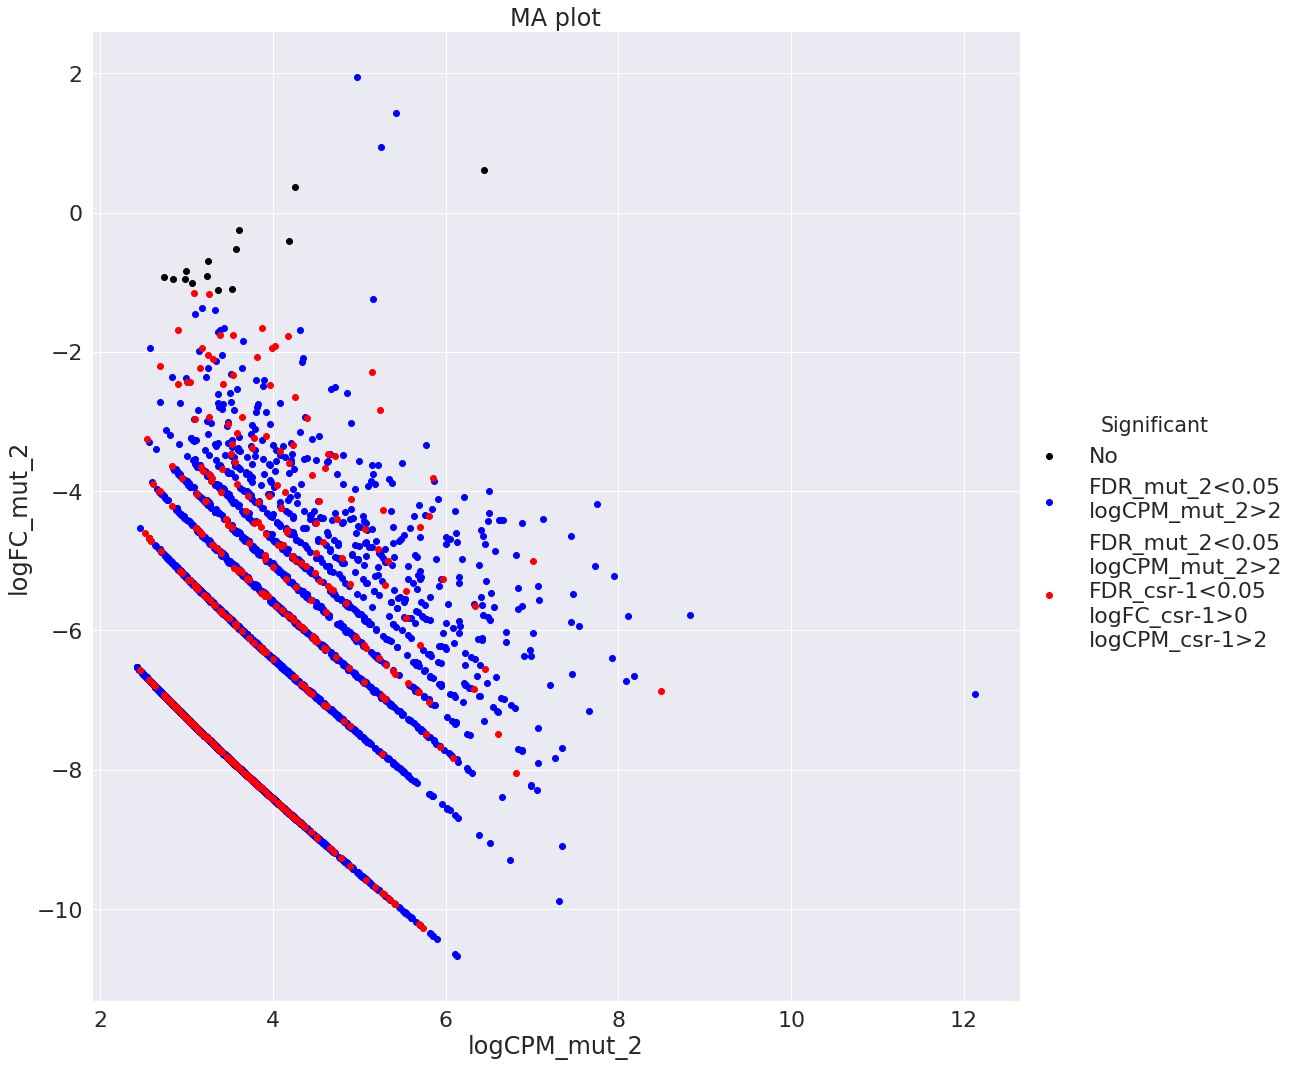

Significant
FDR_mut_2<0.05\nlogCPM_mut_2>2                             3732
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_csr-1<0.05\...          363
No                                                           14

In [22]:
df_1_path = ip_csr_1_path
df_2_path = mut_2_path
df_1_name = ip_csr_1_name
df_2_name = mut_2_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())

## 19. IP crs-1 vs mut_7

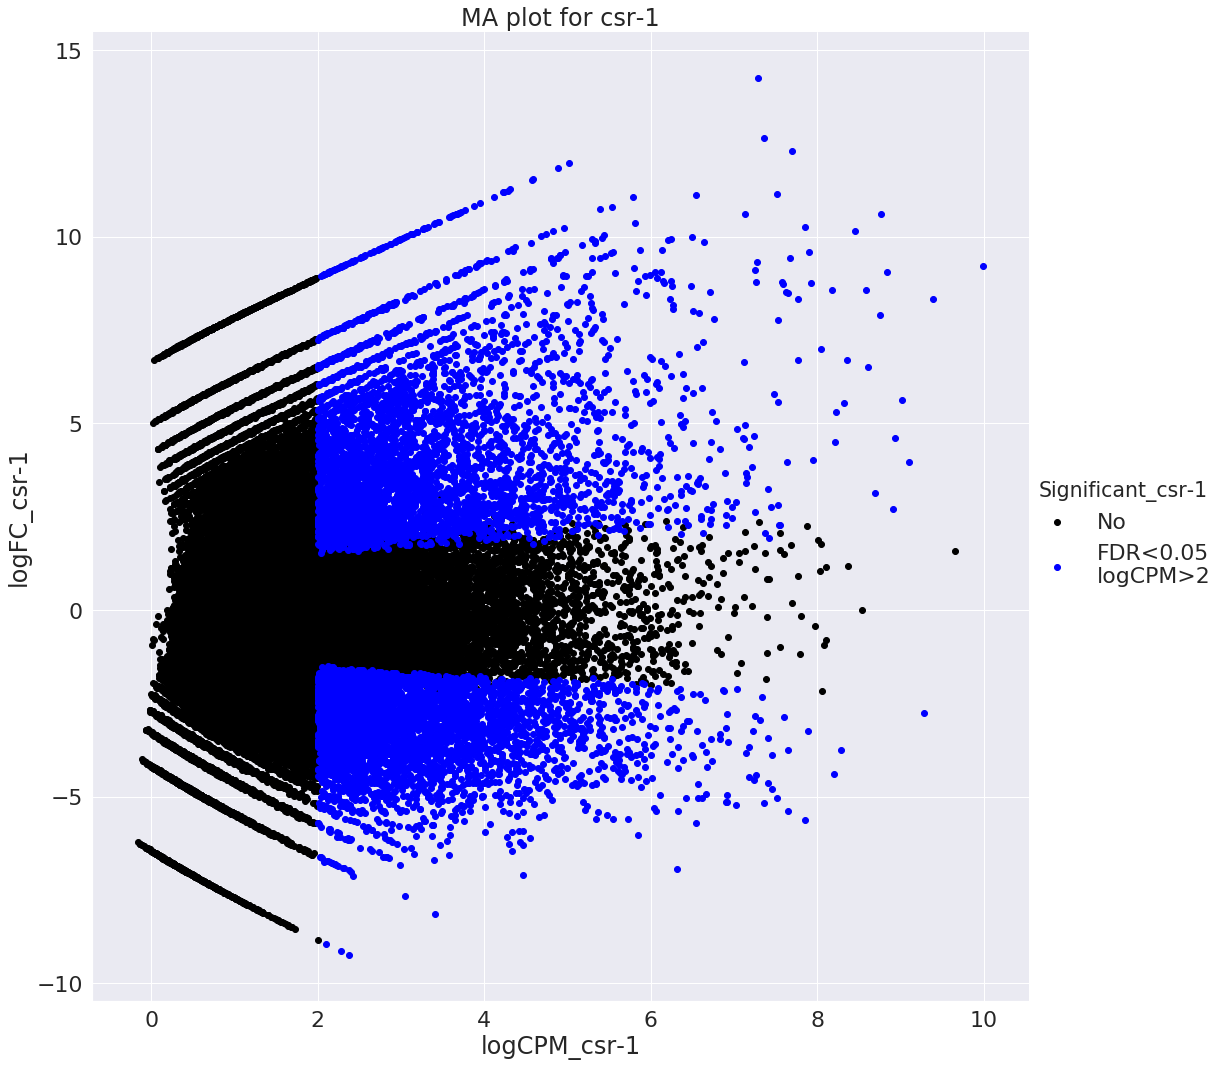

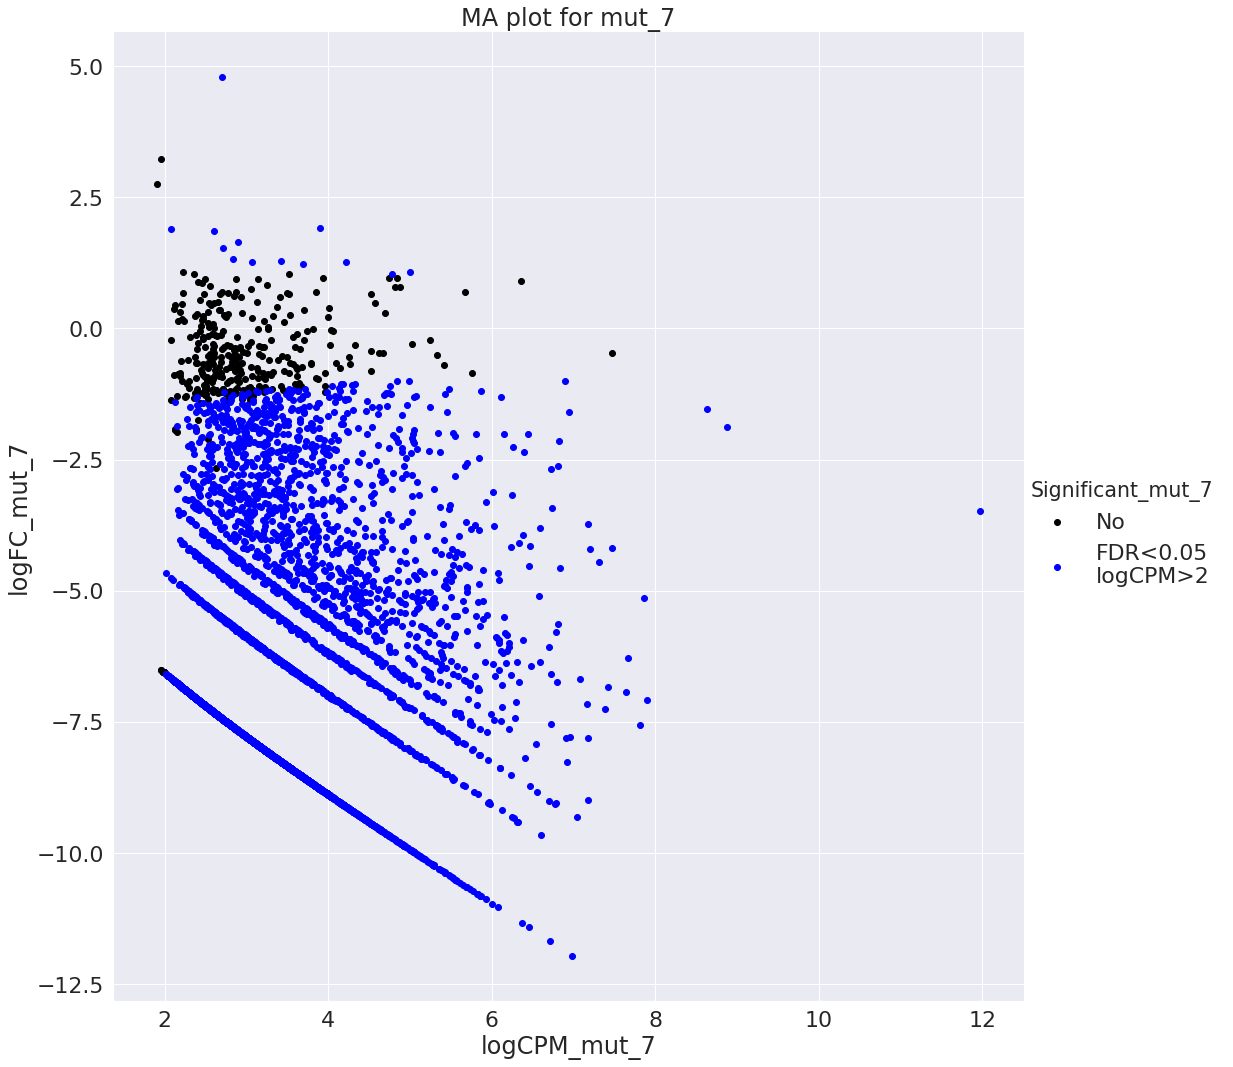

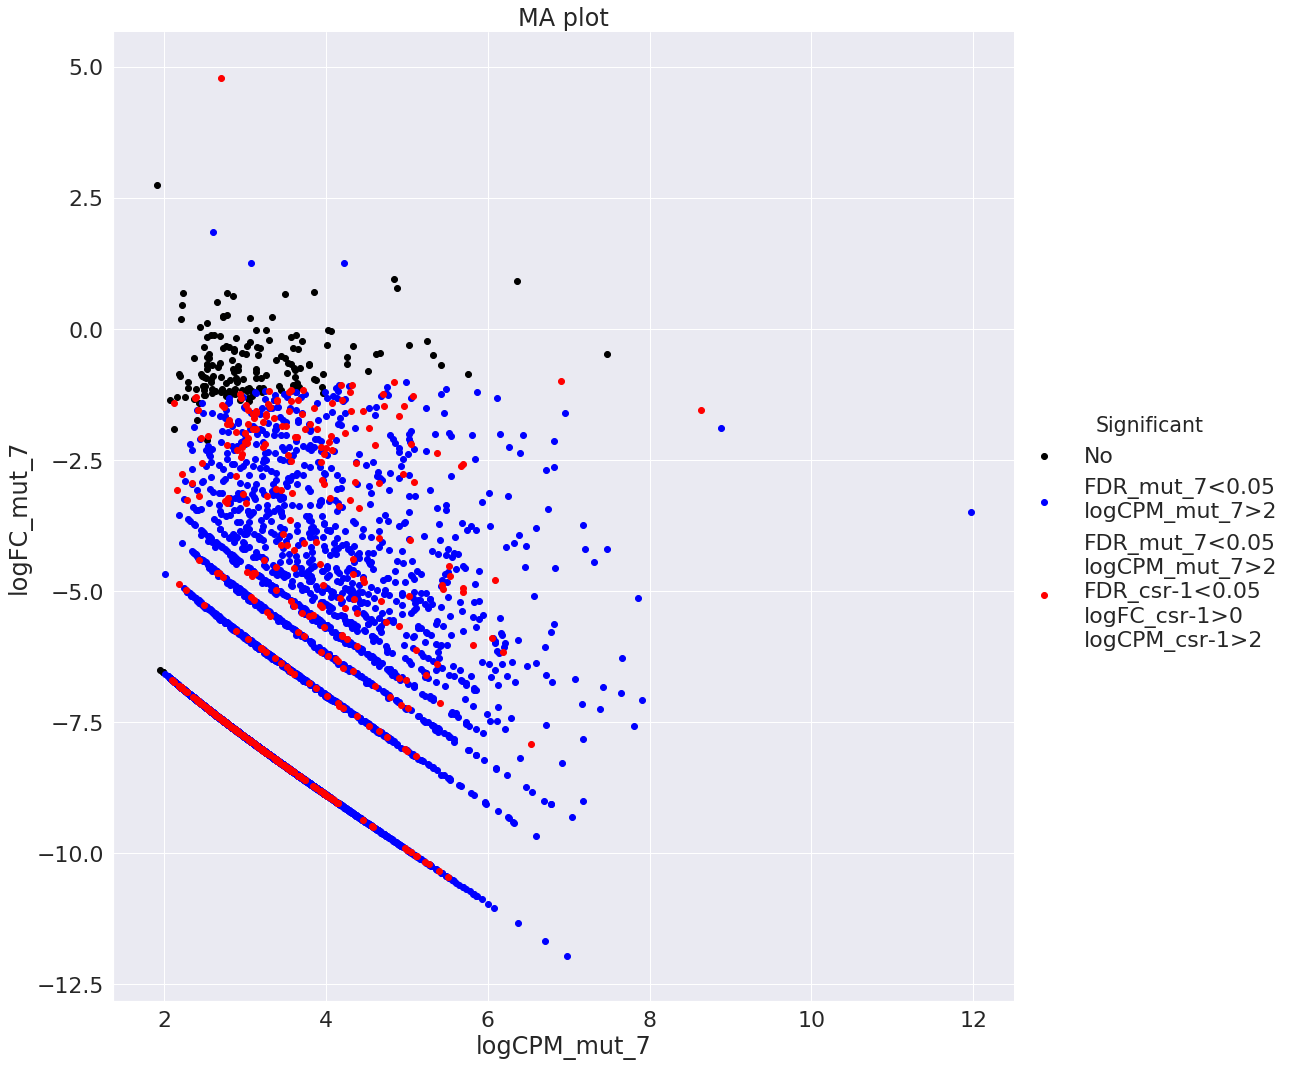

Significant
FDR_mut_7<0.05\nlogCPM_mut_7>2                             3965
FDR_mut_7<0.05\nlogCPM_mut_7>2\nFDR_csr-1<0.05\...          375
No                                                          168

In [23]:
df_1_path = ip_csr_1_path
df_2_path = mut_7_path
df_1_name = ip_csr_1_name
df_2_name = mut_7_name

df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

df_all["Significant"] = "No"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"

df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
           (df_all[f"logCPM_{df_2_name}"]>2) &
           (df_all[f"FDR_{df_1_name}"]<0.05) &
           (df_all[f"logFC_{df_1_name}"]>0) &
           (df_all[f"logCPM_{df_1_name}"]>2),
            "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"


sns.set(font_scale=2)
sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                      y=f"logFC_{df_2_name}",
                      data=df_all,
                      fit_reg=False,
                      hue=f"Significant",
                      hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                      palette=["black", "blue", "red"],
                      scatter_kws={'alpha':1},
                      height=15,
                      aspect=1)
ax = plt.gca()
ax.set_title(f"MA plot")

plt.savefig(f"plots/MA_{df_2_name}_mark_{df_1_name}.pdf")
plt.show()


pd.DataFrame(df_all["Significant"].value_counts())